In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import numpy as np
import matplotlib.cm as cm
plt.rcParams['font.family'] ='Malgun Gothic'
plt.rcParams['axes.unicode_minus'] =False

In [2]:
import warnings
warnings.filterwarnings("ignore")

In [3]:
movie_data = pd.read_csv('./use_data_3/(완)[KOBIS] 박스오피스_일별(2003~2022)_장르_수정.csv')
movie_data

,순위,영화명,개봉일,등급,장르,대표국적,국적,제작사,배급사,감독,배우,기준일,매출액,누적매출액,관객수,누적관객수,스크린수,상영횟수
0,1,동갑내기 과외하기,2003-02-07,12세관람가,코미디,한국,한국,코리아 엔터테인먼트,CJ ENM,김경형,"김하늘,권상우,공유,김지우,백일섭,김혜옥,김자옥,오승근,이성진,손영민,송병철,신지현...",2003-01-12,633500,633500,102,102,1,1
1,1,매트릭스3 레볼루션,2003-11-05,15세관람가,"SF,액션,범죄",미국,미국,NaN,워너브러더스 코리아(주),"릴리 워쇼스키,라나 워쇼스키","키아누 리브스,로렌스 피쉬번,캐리 앤 모스",2003-11-11,7676000,7676000,870,870,6,16
2,2,위대한 유산,2003-10-24,15세관람가,코미디,한국,한국,CJ ENM,CJ ENM,오상훈,"김선아,임창정,최무인,송은정,홍금봉,신성아,김대중,오유진,유순철,신이,모지은,김기천...",2003-11-11,1658000,1658000,177,177,1,3
3,3,황산벌,2003-10-17,15세관람가,코미디,한국,한국,(주)씨네월드,(주)씨네월드,이준익,"박중훈,정진영,오지명,김병철,김선아,김윤태,이문식,조대은,김만수,김현두,나수원,조철...",2003-11-11,1257000,1257000,116,116,1,3
4,4,아이덴티티,2003-10-31,15세관람가,"범죄,스릴러",미국,미국,콜럼비아트라이스타,콜럼비아트라이스타,제임스 맨골드,"존 쿠삭,레이 리오타",2003-11-11,821000,821000,102,102,1,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
482747,34,애프터 양,2022-06-01,전체관람가,"드라마,SF",미국,미국,NaN,"(주)영화특별시에스엠씨,주식회사 왓챠",코고나다,콜린 파렐,2022-12-31,629910,389758300,90,40233,1,1
482748,31,더 메뉴,2022-12-07,15세이상관람가,스릴러,미국,미국,NaN,월트디즈니컴퍼니코리아 유한책임회사,마크 미로드,"랄프 파인즈,안야 테일러 조이,니콜라스 홀트,자넷 맥티어,주디스 라이트,존 레귀자모",2022-12-31,1047000,320680200,107,31360,3,3
482749,28,양자경의 더 모든 날 모든 순간,2022-11-23,15세이상관람가,"액션,코미디",미국,미국,NaN,워터홀컴퍼니(주),"다니엘 콴,다니엘 쉐이너트","양자경,스테파니 수,키 호이 콴,제이미 리 커티스",2022-12-31,2703789,291016371,276,27325,7,8
482750,26,캐리와 슈퍼콜라,2023-01-18,전체관람가,애니메이션,한국,한국,(주)캐리소프트,롯데컬처웍스(주)롯데엔터테인먼트,"오성윤,이춘백","최정윤,엄상현,이다은,원옥화,정주원,이창민,한상태,김지정,강나후,김신비,소경호",2022-12-31,3993000,3993000,295,295,1,1


# 1000만 관객 영화 필터링

In [4]:
movie_1000 = movie_data[movie_data['누적관객수'] >= 10000000]
movie_1000

,순위,영화명,개봉일,등급,장르,대표국적,국적,제작사,배급사,감독,배우,기준일,매출액,누적매출액,관객수,누적관객수,스크린수,상영횟수
21768,3,왕의 남자,2005-12-29,15세이상관람가,드라마,한국,한국,"(주)씨네월드,(주)이글픽쳐스",(주)시네마서비스,이준익,"감우성,이준기,유해진,정진영,박영수,강성연,이건우,이동수,이동헌,유효정,윤준식,박성...",2006-03-04,382072300,62815618400,59303,10005269,167,1009
21805,2,왕의 남자,2005-12-29,15세이상관람가,드라마,한국,한국,"(주)씨네월드,(주)이글픽쳐스",(주)시네마서비스,이준익,"감우성,이준기,유해진,정진영,박영수,강성연,이건우,이동수,이동헌,유효정,윤준식,박성...",2006-03-05,493276000,63308894400,76712,10081981,165,949
21845,2,왕의 남자,2005-12-29,15세이상관람가,드라마,한국,한국,"(주)씨네월드,(주)이글픽쳐스",(주)시네마서비스,이준익,"감우성,이준기,유해진,정진영,박영수,강성연,이건우,이동수,이동헌,유효정,윤준식,박성...",2006-03-06,184110000,63493004400,29646,10111627,162,901
21882,2,왕의 남자,2005-12-29,15세이상관람가,드라마,한국,한국,"(주)씨네월드,(주)이글픽쳐스",(주)시네마서비스,이준익,"감우성,이준기,유해진,정진영,박영수,강성연,이건우,이동수,이동헌,유효정,윤준식,박성...",2006-03-07,166758000,63659762400,26999,10138626,165,917
21923,2,왕의 남자,2005-12-29,15세이상관람가,드라마,한국,한국,"(주)씨네월드,(주)이글픽쳐스",(주)시네마서비스,이준익,"감우성,이준기,유해진,정진영,박영수,강성연,이건우,이동수,이동헌,유효정,윤준식,박성...",2006-03-08,140904000,63800666400,22970,10161596,163,903
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
480685,93,변호인,2013-12-18,15세이상관람가,드라마,한국,한국,위더스필름(주),(주)넥스트엔터테인먼트월드(NEW),양우석,"송강호,김영애,오달수,곽도원,임시완,송영창,정원중,조민기,이항나,이성민,차광수,한기...",2022-12-10,94000,82876607788,11,11375387,1,1
480848,100,택시운전사,2017-08-02,15세이상관람가,드라마,한국,한국,더램프(주),(주)쇼박스,장훈,"이수민,송강호,토마스 크레취만,유해진,류준열,박혁권,최귀화,이창섭,이호균,서정우,송...",2022-12-11,42000,95871631649,4,12189706,1,1
480923,73,변호인,2013-12-18,15세이상관람가,드라마,한국,한국,위더스필름(주),(주)넥스트엔터테인먼트월드(NEW),양우석,"송강호,김영애,오달수,곽도원,임시완,송영창,정원중,조민기,이항나,이성민,차광수,한기...",2022-12-12,106000,82876713788,12,11375399,1,1
481786,42,명량,2014-07-30,15세이상관람가,"사극,액션",한국,한국,(주)빅스톤픽쳐스,(주)씨제이이엔엠,김한민,"최민식,류승룡,조진웅,김명곤,진구,이정현,권율,노민우,이승준,오타니 료헤이,박보검,...",2022-12-20,450000,135758658810,75,17615919,2,2


In [5]:
movie_1000

,순위,영화명,개봉일,등급,장르,대표국적,국적,제작사,배급사,감독,배우,기준일,매출액,누적매출액,관객수,누적관객수,스크린수,상영횟수
21768,3,왕의 남자,2005-12-29,15세이상관람가,드라마,한국,한국,"(주)씨네월드,(주)이글픽쳐스",(주)시네마서비스,이준익,"감우성,이준기,유해진,정진영,박영수,강성연,이건우,이동수,이동헌,유효정,윤준식,박성...",2006-03-04,382072300,62815618400,59303,10005269,167,1009
21805,2,왕의 남자,2005-12-29,15세이상관람가,드라마,한국,한국,"(주)씨네월드,(주)이글픽쳐스",(주)시네마서비스,이준익,"감우성,이준기,유해진,정진영,박영수,강성연,이건우,이동수,이동헌,유효정,윤준식,박성...",2006-03-05,493276000,63308894400,76712,10081981,165,949
21845,2,왕의 남자,2005-12-29,15세이상관람가,드라마,한국,한국,"(주)씨네월드,(주)이글픽쳐스",(주)시네마서비스,이준익,"감우성,이준기,유해진,정진영,박영수,강성연,이건우,이동수,이동헌,유효정,윤준식,박성...",2006-03-06,184110000,63493004400,29646,10111627,162,901
21882,2,왕의 남자,2005-12-29,15세이상관람가,드라마,한국,한국,"(주)씨네월드,(주)이글픽쳐스",(주)시네마서비스,이준익,"감우성,이준기,유해진,정진영,박영수,강성연,이건우,이동수,이동헌,유효정,윤준식,박성...",2006-03-07,166758000,63659762400,26999,10138626,165,917
21923,2,왕의 남자,2005-12-29,15세이상관람가,드라마,한국,한국,"(주)씨네월드,(주)이글픽쳐스",(주)시네마서비스,이준익,"감우성,이준기,유해진,정진영,박영수,강성연,이건우,이동수,이동헌,유효정,윤준식,박성...",2006-03-08,140904000,63800666400,22970,10161596,163,903
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
480685,93,변호인,2013-12-18,15세이상관람가,드라마,한국,한국,위더스필름(주),(주)넥스트엔터테인먼트월드(NEW),양우석,"송강호,김영애,오달수,곽도원,임시완,송영창,정원중,조민기,이항나,이성민,차광수,한기...",2022-12-10,94000,82876607788,11,11375387,1,1
480848,100,택시운전사,2017-08-02,15세이상관람가,드라마,한국,한국,더램프(주),(주)쇼박스,장훈,"이수민,송강호,토마스 크레취만,유해진,류준열,박혁권,최귀화,이창섭,이호균,서정우,송...",2022-12-11,42000,95871631649,4,12189706,1,1
480923,73,변호인,2013-12-18,15세이상관람가,드라마,한국,한국,위더스필름(주),(주)넥스트엔터테인먼트월드(NEW),양우석,"송강호,김영애,오달수,곽도원,임시완,송영창,정원중,조민기,이항나,이성민,차광수,한기...",2022-12-12,106000,82876713788,12,11375399,1,1
481786,42,명량,2014-07-30,15세이상관람가,"사극,액션",한국,한국,(주)빅스톤픽쳐스,(주)씨제이이엔엠,김한민,"최민식,류승룡,조진웅,김명곤,진구,이정현,권율,노민우,이승준,오타니 료헤이,박보검,...",2022-12-20,450000,135758658810,75,17615919,2,2


In [6]:
movie_1000['영화명'].unique()

array(['왕의 남자', '괴물', '해운대', '아바타', '도둑들', '광해, 왕이 된 남자', '7번방의 선물',
       '변호인', '겨울왕국', '명량', '인터스텔라', '국제시장', '어벤져스: 에이지 오브 울트론', '암살',
       '베테랑', '부산행', '택시운전사', '신과함께-죄와 벌', '어벤져스: 인피니티 워', '신과함께-인과 연',
       '극한직업', '어벤져스: 엔드게임', '알라딘', '기생충', '겨울왕국 2', '범죄도시2'],
      dtype=object)

In [7]:
movie_1000.drop_duplicates(subset='영화명', keep='last', inplace=True)

In [8]:
len(movie_1000)

26

In [9]:
movie_1000

,순위,영화명,개봉일,등급,장르,대표국적,국적,제작사,배급사,감독,배우,기준일,매출액,누적매출액,관객수,누적관객수,스크린수,상영횟수
329329,17,아바타,2009-12-17,12세이상관람가,"SF,액션,어드벤처",미국,미국,이십세기폭스필름코퍼레이션,"주식회사 해리슨앤컴퍼니,이십세기폭스코리아(주)",제임스 카메론,"샘 워싱턴,조 샐다나,시고니 위버",2018-07-03,8099000,125304346000,776,13338863,27,79
359289,37,괴물,2006-07-27,12세관람가,"SF,가족,드라마",한국,한국,영화사청어람(주),(주)쇼박스,봉준호,"송강호,변희봉,박해일,배두나,고아성,오달수,박노식,라미란,고수희,윤제문,김뢰하,고창...",2019-05-26,943500,66717700300,106,10917400,1,1
372424,61,베테랑,2015-08-05,15세이상관람가,"액션,드라마",한국,한국,"(주)외유내강,(주)필름케이",(주)씨제이이엔엠,류승완,"황정민,유아인,유해진,오달수,장윤주,김시후,오대환,정웅인,정만식,송영창,진경,유인영...",2019-10-23,324000,105170856250,61,13414484,9,10
378626,66,"광해, 왕이 된 남자",2012-09-13,15세이상관람가,"사극,드라마",한국,한국,"리얼라이즈픽쳐스(주),(주)씨제이이엔엠",(주)씨제이이엔엠,추창민,"이병헌,류승룡,한효주,장광,김인권,심은경,김명곤,서진원,장재현,정창국,조혜정,김남준...",2019-12-18,300000,88913283469,60,12324062,1,1
386725,35,겨울왕국 2,2019-11-21,전체관람가,애니메이션,미국,미국,NaN,월트디즈니컴퍼니코리아 유한책임회사,"크리스 벅,제니퍼 리","크리스틴 벨,이디나 멘젤,조시 게드,조나단 그로프",2020-03-21,1575000,114810421450,177,13747792,1,1
386726,35,겨울왕국,2014-01-16,전체관람가,"애니메이션,어드벤처,가족,코미디,뮤지컬,판타지",미국,미국,NaN,소니픽쳐스릴리징월트디즈니스튜디오스코리아(주),"크리스 벅,제니퍼 리","이디나 멘젤,크리스틴 벨,조나단 그로프,조시 게드",2020-03-21,1575000,82521307080,177,10303058,1,1
391614,11,어벤져스: 인피니티 워,2018-04-25,12세이상관람가,"액션,어드벤처,판타지,SF",미국,미국,NaN,월트디즈니컴퍼니코리아 유한책임회사,"안소니 루소,조 루소","로버트 다우니 주니어,조슈 브롤린,마크 러팔로,톰 히들스턴,크리스 에반스,크리스 헴...",2020-05-05,17517900,100081428549,2455,11233176,330,402
391617,8,어벤져스: 엔드게임,2019-04-24,12세이상관람가,"액션,SF",미국,미국,NaN,월트디즈니컴퍼니코리아 유한책임회사,"안소니 루소,조 루소","로버트 다우니 주니어,크리스 에반스,마크 러팔로,크리스 헴스워스,스칼렛 요한슨,제레...",2020-05-05,47233940,122492181020,6668,13977602,439,587
393794,73,7번방의 선물,2013-01-23,15세이상관람가,"코미디,드라마",한국,한국,"(주)화인웍스,(주)씨엘엔터테인먼트",(주)넥스트엔터테인먼트월드(NEW),이환경,"장이준,류승룡,박신혜,갈소원,정진영,오달수,박원상,김정태,정만식,김기천,장호준,김동...",2020-05-27,52000,91437368170,10,12812144,5,5
395194,108,극한직업,2019-01-23,15세이상관람가,코미디,한국,한국,"(주)어바웃잇,영화사 해그림 주식회사,(주)씨제이이엔엠",(주)씨제이이엔엠,이병헌,"류승룡,이하늬,진선규,이동휘,공명,양현민,장진희,한준우,김명준,나철,정재광,정원창,...",2020-06-09,6000,139655543516,1,16266338,1,1


# 천만관객 영화 장르 분석

In [10]:
movie_1000[['영화명', '장르']]

,영화명,장르
329329,아바타,"SF,액션,어드벤처"
359289,괴물,"SF,가족,드라마"
372424,베테랑,"액션,드라마"
378626,"광해, 왕이 된 남자","사극,드라마"
386725,겨울왕국 2,애니메이션
386726,겨울왕국,"애니메이션,어드벤처,가족,코미디,뮤지컬,판타지"
391614,어벤져스: 인피니티 워,"액션,어드벤처,판타지,SF"
391617,어벤져스: 엔드게임,"액션,SF"
393794,7번방의 선물,"코미디,드라마"
395194,극한직업,코미디


In [11]:
movie_1000['장르'].iloc[0]

'SF,액션,어드벤처'

In [12]:
dra = 0 # 드라마
sf = 0 # SF
act = 0 # 액션
adv = 0 # 어드벤처
com = 0 # 코미디
cri = 0 # 범죄
mel = 0 # 멜로/로맨스
fam = 0 # 가족
mus = 0 # 뮤지컬
fan = 0 # 판타지
ani = 0 # 애니메이션
mys = 0 # 미스터리
thr = 0 # 스릴러
his = 0 # 사극
doc = 0 # 다큐멘터리
war = 0 # 전쟁
hor = 0 # 공포
etc = 0 # 기타(기타, 서부극)

for i in range(len(movie_1000)):
    try:
        detail_genre = movie_1000['장르'].iloc[i].split(',')
        for j in range(len(detail_genre)):
            if detail_genre[j] == '드라마':
                dra = dra + 1
            elif detail_genre[j] == 'SF':
                sf = sf + 1
            elif detail_genre[j] == '액션':
                act = act + 1
            elif detail_genre[j] == '어드벤처':
                adv = adv + 1
            elif detail_genre[j] == '코미디':
                com = com + 1
            elif detail_genre[j] == '범죄':
                cri = cri + 1
            elif detail_genre[j] == '멜로/로맨스':
                mel = mel + 1
            elif detail_genre[j] == '가족':
                fam = fam + 1
            elif detail_genre[j] == '뮤지컬':
                mus = mus + 1
            elif detail_genre[j] == '판타지':
                fan = fan + 1
            elif detail_genre[j] == '애니메이션':
                ani = ani + 1
            elif detail_genre[j] == '미스터리':
                mys = mys + 1
            elif detail_genre[j] == '스릴러':
                thr = thr + 1
            elif detail_genre[j] == '사극':
                his = his + 1
            elif detail_genre[j] == '다큐멘터리':
                doc = doc + 1
            elif detail_genre[j] == '전쟁':
                war = war + 1
            elif detail_genre[j] == '공포(호러)':
                hor = hor + 1
            else:
                print(detail_genre[j])
                etc = etc + 1
    except:
        continue
print(dra,sf,act,adv,com,cri,mel,fam,mus,fan,ani,mys,thr,his,doc,war,hor,etc)

genre_freq = pd.DataFrame([[dra, sf, act, adv, com, cri, fam, mus, fan, ani, thr, his]],
                          columns = ['드라마', 'SF', '액션', '어드벤처', '코미디', '범죄',
                                    '가족', '뮤지컬', '판타지', '애니메이션', '스릴러', '사극'],
                         index = ['빈도수'])

13 6 11 6 3 2 0 3 1 6 2 0 1 2 0 0 0 0


In [13]:
genre_freq

,드라마,SF,액션,어드벤처,코미디,범죄,가족,뮤지컬,판타지,애니메이션,스릴러,사극
빈도수,13,6,11,6,3,2,3,1,6,2,1,2


# 천만관객 영화 장르 분포 시각화

In [58]:
 # 색상 맵 선택
cmap = cm.get_cmap('tab20c')
colors = cmap(np.array(range(1,50)))

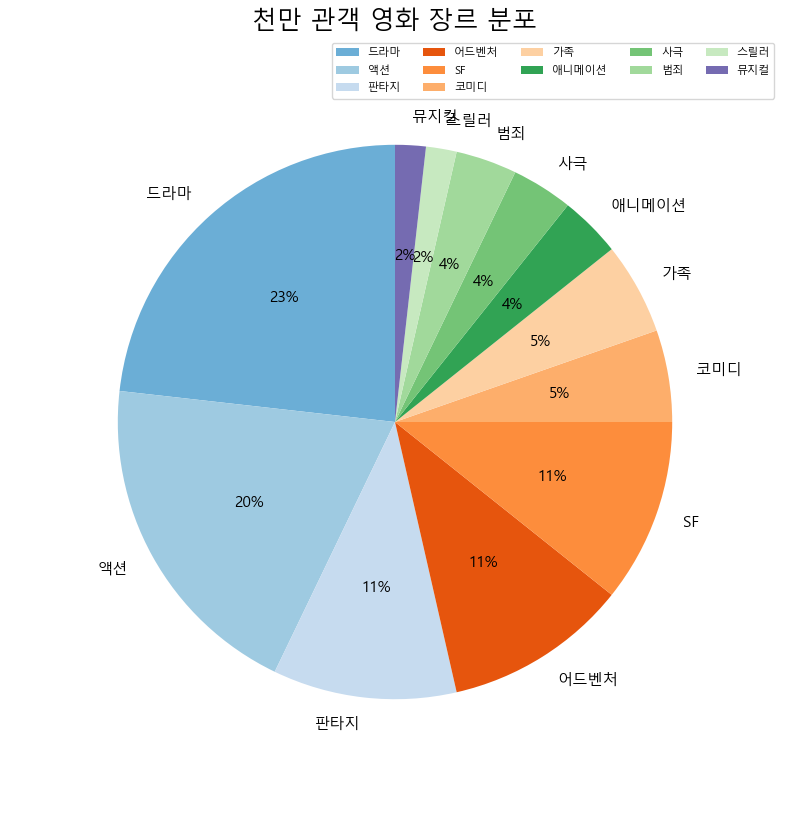

In [101]:
labels = genre_freq.columns.tolist()
ratio = genre_freq.values.flatten().tolist()

# 비율순으로 정렬
sorted_ratio, sorted_labels = zip(*sorted(zip(ratio, labels), reverse=True))

plt.figure(figsize=(10, 10))

plt.pie(sorted_ratio, labels=sorted_labels, autopct='%.0f%%', startangle=90, radius=0.9, colors=colors[0::1], textprops={'fontsize': 11})
plt.title('천만 관객 영화 장르 분포', size=18)
plt.legend(sorted_labels, loc='upper right', fontsize=8, ncol=5)

plt.show()

# 천만 관객 개봉 월 분석

In [16]:
mv_ymd = pd.to_datetime(movie_1000['개봉일'])
mv_ymd

329329   2009-12-17
359289   2006-07-27
372424   2015-08-05
378626   2012-09-13
386725   2019-11-21
386726   2014-01-16
391614   2018-04-25
391617   2019-04-24
393794   2013-01-23
395194   2019-01-23
405385   2005-12-29
418675   2017-12-20
424892   2012-07-25
447647   2018-08-01
467167   2009-07-22
472907   2019-05-23
474758   2014-11-06
475899   2016-07-20
475904   2022-05-18
477556   2015-04-23
477908   2019-05-30
479778   2015-07-22
480848   2017-08-02
480923   2013-12-18
481786   2014-07-30
482061   2014-12-17
Name: 개봉일, dtype: datetime64[ns]

In [17]:
movie_1000

,순위,영화명,개봉일,등급,장르,대표국적,국적,제작사,배급사,감독,배우,기준일,매출액,누적매출액,관객수,누적관객수,스크린수,상영횟수
329329,17,아바타,2009-12-17,12세이상관람가,"SF,액션,어드벤처",미국,미국,이십세기폭스필름코퍼레이션,"주식회사 해리슨앤컴퍼니,이십세기폭스코리아(주)",제임스 카메론,"샘 워싱턴,조 샐다나,시고니 위버",2018-07-03,8099000,125304346000,776,13338863,27,79
359289,37,괴물,2006-07-27,12세관람가,"SF,가족,드라마",한국,한국,영화사청어람(주),(주)쇼박스,봉준호,"송강호,변희봉,박해일,배두나,고아성,오달수,박노식,라미란,고수희,윤제문,김뢰하,고창...",2019-05-26,943500,66717700300,106,10917400,1,1
372424,61,베테랑,2015-08-05,15세이상관람가,"액션,드라마",한국,한국,"(주)외유내강,(주)필름케이",(주)씨제이이엔엠,류승완,"황정민,유아인,유해진,오달수,장윤주,김시후,오대환,정웅인,정만식,송영창,진경,유인영...",2019-10-23,324000,105170856250,61,13414484,9,10
378626,66,"광해, 왕이 된 남자",2012-09-13,15세이상관람가,"사극,드라마",한국,한국,"리얼라이즈픽쳐스(주),(주)씨제이이엔엠",(주)씨제이이엔엠,추창민,"이병헌,류승룡,한효주,장광,김인권,심은경,김명곤,서진원,장재현,정창국,조혜정,김남준...",2019-12-18,300000,88913283469,60,12324062,1,1
386725,35,겨울왕국 2,2019-11-21,전체관람가,애니메이션,미국,미국,NaN,월트디즈니컴퍼니코리아 유한책임회사,"크리스 벅,제니퍼 리","크리스틴 벨,이디나 멘젤,조시 게드,조나단 그로프",2020-03-21,1575000,114810421450,177,13747792,1,1
386726,35,겨울왕국,2014-01-16,전체관람가,"애니메이션,어드벤처,가족,코미디,뮤지컬,판타지",미국,미국,NaN,소니픽쳐스릴리징월트디즈니스튜디오스코리아(주),"크리스 벅,제니퍼 리","이디나 멘젤,크리스틴 벨,조나단 그로프,조시 게드",2020-03-21,1575000,82521307080,177,10303058,1,1
391614,11,어벤져스: 인피니티 워,2018-04-25,12세이상관람가,"액션,어드벤처,판타지,SF",미국,미국,NaN,월트디즈니컴퍼니코리아 유한책임회사,"안소니 루소,조 루소","로버트 다우니 주니어,조슈 브롤린,마크 러팔로,톰 히들스턴,크리스 에반스,크리스 헴...",2020-05-05,17517900,100081428549,2455,11233176,330,402
391617,8,어벤져스: 엔드게임,2019-04-24,12세이상관람가,"액션,SF",미국,미국,NaN,월트디즈니컴퍼니코리아 유한책임회사,"안소니 루소,조 루소","로버트 다우니 주니어,크리스 에반스,마크 러팔로,크리스 헴스워스,스칼렛 요한슨,제레...",2020-05-05,47233940,122492181020,6668,13977602,439,587
393794,73,7번방의 선물,2013-01-23,15세이상관람가,"코미디,드라마",한국,한국,"(주)화인웍스,(주)씨엘엔터테인먼트",(주)넥스트엔터테인먼트월드(NEW),이환경,"장이준,류승룡,박신혜,갈소원,정진영,오달수,박원상,김정태,정만식,김기천,장호준,김동...",2020-05-27,52000,91437368170,10,12812144,5,5
395194,108,극한직업,2019-01-23,15세이상관람가,코미디,한국,한국,"(주)어바웃잇,영화사 해그림 주식회사,(주)씨제이이엔엠",(주)씨제이이엔엠,이병헌,"류승룡,이하늬,진선규,이동휘,공명,양현민,장진희,한준우,김명준,나철,정재광,정원창,...",2020-06-09,6000,139655543516,1,16266338,1,1


In [18]:
movie_1000['개봉연도'] = mv_ymd.dt.year
movie_1000['개봉월'] = mv_ymd.dt.month
movie_1000['개봉일'] = mv_ymd.dt.day

day_of_week = mv_ymd.dt.dayofweek
day_map = {0: '월', 1: '화', 2: '수', 3: '목', 4: '금', 5: '토', 6: '일'}
movie_1000['개봉요일'] = day_of_week.map(day_map)

movie_1000 = movie_1000[['순위','영화명','개봉연도','개봉월','개봉일','개봉요일',
                         '등급','장르','대표국적','국적','제작사','배급사','감독',
                         '배우 ','기준일','매출액','누적매출액','관객수','누적관객수',
                         '스크린수','상영횟수']]
movie_1000

,순위,영화명,개봉연도,개봉월,개봉일,개봉요일,등급,장르,대표국적,국적,...,배급사,감독,배우,기준일,매출액,누적매출액,관객수,누적관객수,스크린수,상영횟수
329329,17,아바타,2009,12,17,목,12세이상관람가,"SF,액션,어드벤처",미국,미국,...,"주식회사 해리슨앤컴퍼니,이십세기폭스코리아(주)",제임스 카메론,"샘 워싱턴,조 샐다나,시고니 위버",2018-07-03,8099000,125304346000,776,13338863,27,79
359289,37,괴물,2006,7,27,목,12세관람가,"SF,가족,드라마",한국,한국,...,(주)쇼박스,봉준호,"송강호,변희봉,박해일,배두나,고아성,오달수,박노식,라미란,고수희,윤제문,김뢰하,고창...",2019-05-26,943500,66717700300,106,10917400,1,1
372424,61,베테랑,2015,8,5,수,15세이상관람가,"액션,드라마",한국,한국,...,(주)씨제이이엔엠,류승완,"황정민,유아인,유해진,오달수,장윤주,김시후,오대환,정웅인,정만식,송영창,진경,유인영...",2019-10-23,324000,105170856250,61,13414484,9,10
378626,66,"광해, 왕이 된 남자",2012,9,13,목,15세이상관람가,"사극,드라마",한국,한국,...,(주)씨제이이엔엠,추창민,"이병헌,류승룡,한효주,장광,김인권,심은경,김명곤,서진원,장재현,정창국,조혜정,김남준...",2019-12-18,300000,88913283469,60,12324062,1,1
386725,35,겨울왕국 2,2019,11,21,목,전체관람가,애니메이션,미국,미국,...,월트디즈니컴퍼니코리아 유한책임회사,"크리스 벅,제니퍼 리","크리스틴 벨,이디나 멘젤,조시 게드,조나단 그로프",2020-03-21,1575000,114810421450,177,13747792,1,1
386726,35,겨울왕국,2014,1,16,목,전체관람가,"애니메이션,어드벤처,가족,코미디,뮤지컬,판타지",미국,미국,...,소니픽쳐스릴리징월트디즈니스튜디오스코리아(주),"크리스 벅,제니퍼 리","이디나 멘젤,크리스틴 벨,조나단 그로프,조시 게드",2020-03-21,1575000,82521307080,177,10303058,1,1
391614,11,어벤져스: 인피니티 워,2018,4,25,수,12세이상관람가,"액션,어드벤처,판타지,SF",미국,미국,...,월트디즈니컴퍼니코리아 유한책임회사,"안소니 루소,조 루소","로버트 다우니 주니어,조슈 브롤린,마크 러팔로,톰 히들스턴,크리스 에반스,크리스 헴...",2020-05-05,17517900,100081428549,2455,11233176,330,402
391617,8,어벤져스: 엔드게임,2019,4,24,수,12세이상관람가,"액션,SF",미국,미국,...,월트디즈니컴퍼니코리아 유한책임회사,"안소니 루소,조 루소","로버트 다우니 주니어,크리스 에반스,마크 러팔로,크리스 헴스워스,스칼렛 요한슨,제레...",2020-05-05,47233940,122492181020,6668,13977602,439,587
393794,73,7번방의 선물,2013,1,23,수,15세이상관람가,"코미디,드라마",한국,한국,...,(주)넥스트엔터테인먼트월드(NEW),이환경,"장이준,류승룡,박신혜,갈소원,정진영,오달수,박원상,김정태,정만식,김기천,장호준,김동...",2020-05-27,52000,91437368170,10,12812144,5,5
395194,108,극한직업,2019,1,23,수,15세이상관람가,코미디,한국,한국,...,(주)씨제이이엔엠,이병헌,"류승룡,이하늬,진선규,이동휘,공명,양현민,장진희,한준우,김명준,나철,정재광,정원창,...",2020-06-09,6000,139655543516,1,16266338,1,1


# 천만 관객 개봉 월 시각화

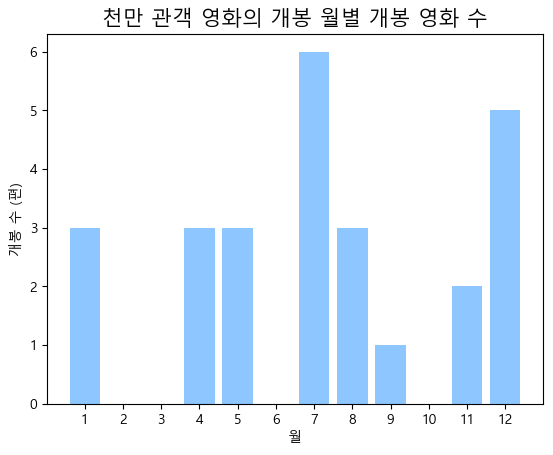

In [19]:


# 개봉월별 개봉영화 수 계산
monthly_counts = movie_1000['개봉월'].value_counts().sort_index()

# 그래프 그리기
plt.bar(monthly_counts.index, monthly_counts.values, color='dodgerblue', alpha=0.5)
plt.xlabel('월')
plt.ylabel('개봉 수 (편)')
plt.title('천만 관객 영화의 개봉 월별 개봉 영화 수', size = 15)
plt.xticks(range(1, 13)) 
plt.show()

# 천만 관객 개봉 요일 시각화

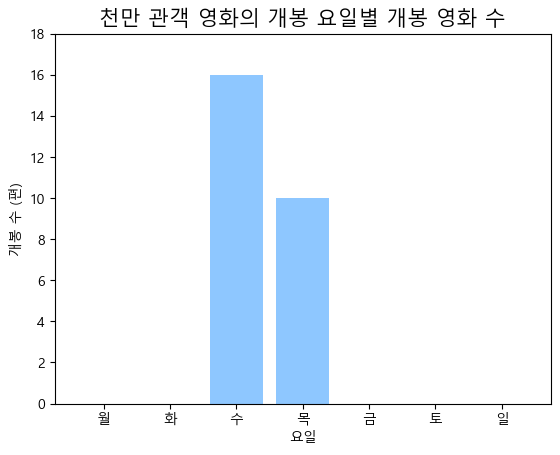

In [20]:
# 요일별 개봉수 계산
weekday_counts = movie_1000['개봉요일'].value_counts().reindex(['월', '화', '수', '목', '금', '토', '일'], fill_value=0)

# 그래프 그리기
plt.bar(weekday_counts.index, weekday_counts.values, color='dodgerblue', alpha=0.5)
plt.xlabel('요일')
plt.ylabel('개봉 수 (편)')
plt.title('천만 관객 영화의 개봉 요일별 개봉 영화 수', size = 15)
plt.ylim(0, 18)

plt.show()

# 같은 개봉일을 같는 영화 추출

In [21]:
# 같은 개봉 월 추출
same_md = movie_1000[movie_1000.duplicated(['개봉월'], keep=False)]
same_md.sort_values('개봉월', inplace=True)
same_md

,순위,영화명,개봉연도,개봉월,개봉일,개봉요일,등급,장르,대표국적,국적,...,배급사,감독,배우,기준일,매출액,누적매출액,관객수,누적관객수,스크린수,상영횟수
386726,35,겨울왕국,2014,1,16,목,전체관람가,"애니메이션,어드벤처,가족,코미디,뮤지컬,판타지",미국,미국,...,소니픽쳐스릴리징월트디즈니스튜디오스코리아(주),"크리스 벅,제니퍼 리","이디나 멘젤,크리스틴 벨,조나단 그로프,조시 게드",2020-03-21,1575000,82521307080,177,10303058,1,1
393794,73,7번방의 선물,2013,1,23,수,15세이상관람가,"코미디,드라마",한국,한국,...,(주)넥스트엔터테인먼트월드(NEW),이환경,"장이준,류승룡,박신혜,갈소원,정진영,오달수,박원상,김정태,정만식,김기천,장호준,김동...",2020-05-27,52000,91437368170,10,12812144,5,5
395194,108,극한직업,2019,1,23,수,15세이상관람가,코미디,한국,한국,...,(주)씨제이이엔엠,이병헌,"류승룡,이하늬,진선규,이동휘,공명,양현민,장진희,한준우,김명준,나철,정재광,정원창,...",2020-06-09,6000,139655543516,1,16266338,1,1
477556,78,어벤져스: 에이지 오브 울트론,2015,4,23,목,12세이상관람가,"액션,어드벤처,판타지,SF",미국,미국,...,"월트디즈니컴퍼니코리아 유한책임회사,월트디즈니컴퍼니코리아(주)",조스 웨던,"로버트 다우니 주니어,크리스 헴스워스,마크 러팔로,크리스 에반스,스칼렛 요한슨,제레...",2022-11-08,198700,88645598646,20,10504487,2,2
391614,11,어벤져스: 인피니티 워,2018,4,25,수,12세이상관람가,"액션,어드벤처,판타지,SF",미국,미국,...,월트디즈니컴퍼니코리아 유한책임회사,"안소니 루소,조 루소","로버트 다우니 주니어,조슈 브롤린,마크 러팔로,톰 히들스턴,크리스 에반스,크리스 헴...",2020-05-05,17517900,100081428549,2455,11233176,330,402
391617,8,어벤져스: 엔드게임,2019,4,24,수,12세이상관람가,"액션,SF",미국,미국,...,월트디즈니컴퍼니코리아 유한책임회사,"안소니 루소,조 루소","로버트 다우니 주니어,크리스 에반스,마크 러팔로,크리스 헴스워스,스칼렛 요한슨,제레...",2020-05-05,47233940,122492181020,6668,13977602,439,587
475904,59,범죄도시2,2022,5,18,수,15세이상관람가,"범죄,액션",한국,한국,...,"주식회사 에이비오엔터테인먼트,플러스엠 엔터테인먼트",이상용,"마동석,손석구,최귀화,박지환,허동원,하준,정재광,남문철,박지영,이주원,음문석,김찬형...",2022-10-22,1545000,131297440478,103,12693302,1,1
477908,50,기생충,2019,5,30,목,15세이상관람가,드라마,한국,한국,...,(주)씨제이이엔엠,봉준호,"송강호,이선균,조여정,최우식,박소담,이정은,장혜진,박명훈,현승민,정현준,윤혜리,박근...",2022-11-11,924000,87463906795,66,10313513,1,1
472907,6,알라딘,2019,5,23,목,전체관람가,"어드벤처,가족,판타지",미국,미국,...,월트디즈니컴퍼니코리아 유한책임회사,가이 리치,"메나 마수드,윌 스미스,나오미 스콧",2022-09-20,24049000,109041960039,2068,12797927,39,123
479778,51,암살,2015,7,22,수,15세이상관람가,"액션,드라마",한국,한국,...,(주)쇼박스,최동훈,"전지현,이정재,하정우,오달수,조진웅,이경영,최덕문,김의성,박병은,김홍파,강용빈,홍성...",2022-12-01,652000,98469385781,92,12706947,1,1


In [22]:
# 같은 개봉 일 추출
same_md = movie_1000[movie_1000.duplicated(['개봉일'], keep=False)]
same_md.sort_values('개봉월')

,순위,영화명,개봉연도,개봉월,개봉일,개봉요일,등급,장르,대표국적,국적,...,배급사,감독,배우,기준일,매출액,누적매출액,관객수,누적관객수,스크린수,상영횟수
393794,73,7번방의 선물,2013,1,23,수,15세이상관람가,"코미디,드라마",한국,한국,...,(주)넥스트엔터테인먼트월드(NEW),이환경,"장이준,류승룡,박신혜,갈소원,정진영,오달수,박원상,김정태,정만식,김기천,장호준,김동...",2020-05-27,52000,91437368170,10,12812144,5,5
395194,108,극한직업,2019,1,23,수,15세이상관람가,코미디,한국,한국,...,(주)씨제이이엔엠,이병헌,"류승룡,이하늬,진선규,이동휘,공명,양현민,장진희,한준우,김명준,나철,정재광,정원창,...",2020-06-09,6000,139655543516,1,16266338,1,1
391614,11,어벤져스: 인피니티 워,2018,4,25,수,12세이상관람가,"액션,어드벤처,판타지,SF",미국,미국,...,월트디즈니컴퍼니코리아 유한책임회사,"안소니 루소,조 루소","로버트 다우니 주니어,조슈 브롤린,마크 러팔로,톰 히들스턴,크리스 에반스,크리스 헴...",2020-05-05,17517900,100081428549,2455,11233176,330,402
477556,78,어벤져스: 에이지 오브 울트론,2015,4,23,목,12세이상관람가,"액션,어드벤처,판타지,SF",미국,미국,...,"월트디즈니컴퍼니코리아 유한책임회사,월트디즈니컴퍼니코리아(주)",조스 웨던,"로버트 다우니 주니어,크리스 헴스워스,마크 러팔로,크리스 에반스,스칼렛 요한슨,제레...",2022-11-08,198700,88645598646,20,10504487,2,2
472907,6,알라딘,2019,5,23,목,전체관람가,"어드벤처,가족,판타지",미국,미국,...,월트디즈니컴퍼니코리아 유한책임회사,가이 리치,"메나 마수드,윌 스미스,나오미 스콧",2022-09-20,24049000,109041960039,2068,12797927,39,123
475904,59,범죄도시2,2022,5,18,수,15세이상관람가,"범죄,액션",한국,한국,...,"주식회사 에이비오엔터테인먼트,플러스엠 엔터테인먼트",이상용,"마동석,손석구,최귀화,박지환,허동원,하준,정재광,남문철,박지영,이주원,음문석,김찬형...",2022-10-22,1545000,131297440478,103,12693302,1,1
477908,50,기생충,2019,5,30,목,15세이상관람가,드라마,한국,한국,...,(주)씨제이이엔엠,봉준호,"송강호,이선균,조여정,최우식,박소담,이정은,장혜진,박명훈,현승민,정현준,윤혜리,박근...",2022-11-11,924000,87463906795,66,10313513,1,1
424892,95,도둑들,2012,7,25,수,15세이상관람가,"액션,범죄",한국,"한국,홍콩",...,(주)쇼박스,최동훈,"김윤석,김혜수,이정재,전지현,임달화,김해숙,오달수,김수현,이심결,증국상,서영주,장동...",2021-03-29,10000,93672497700,2,12984701,1,1
467167,43,해운대,2009,7,22,수,12세이상관람가,"액션,드라마,어드벤처",한국,한국,...,CJ ENM,윤제균,"설경구,하지원,박중훈,엄정화,이민기,강대규,김원영,김유빈,신정원,성유경,박재홍,황인...",2022-07-08,215000,81028720000,43,11325117,1,1
475899,51,부산행,2016,7,20,수,15세이상관람가,"액션,스릴러",한국,한국,...,(주)넥스트엔터테인먼트월드(NEW),연상호,"공유,김정희,정유미,김율호,이주원,이영욱,마동석,김찬호,김운,최우식,안소희,김의성,...",2022-10-22,765000,93188162548,153,11567815,1,3


In [23]:
# 같은 개봉 월일 추출
same_md = movie_1000[movie_1000.duplicated(['개봉월', '개봉일'], keep=False)]
same_md.sort_values('개봉월')

,순위,영화명,개봉연도,개봉월,개봉일,개봉요일,등급,장르,대표국적,국적,...,배급사,감독,배우,기준일,매출액,누적매출액,관객수,누적관객수,스크린수,상영횟수
393794,73,7번방의 선물,2013,1,23,수,15세이상관람가,"코미디,드라마",한국,한국,...,(주)넥스트엔터테인먼트월드(NEW),이환경,"장이준,류승룡,박신혜,갈소원,정진영,오달수,박원상,김정태,정만식,김기천,장호준,김동...",2020-05-27,52000,91437368170,10,12812144,5,5
395194,108,극한직업,2019,1,23,수,15세이상관람가,코미디,한국,한국,...,(주)씨제이이엔엠,이병헌,"류승룡,이하늬,진선규,이동휘,공명,양현민,장진희,한준우,김명준,나철,정재광,정원창,...",2020-06-09,6000,139655543516,1,16266338,1,1
467167,43,해운대,2009,7,22,수,12세이상관람가,"액션,드라마,어드벤처",한국,한국,...,CJ ENM,윤제균,"설경구,하지원,박중훈,엄정화,이민기,강대규,김원영,김유빈,신정원,성유경,박재홍,황인...",2022-07-08,215000,81028720000,43,11325117,1,1
479778,51,암살,2015,7,22,수,15세이상관람가,"액션,드라마",한국,한국,...,(주)쇼박스,최동훈,"전지현,이정재,하정우,오달수,조진웅,이경영,최덕문,김의성,박병은,김홍파,강용빈,홍성...",2022-12-01,652000,98469385781,92,12706947,1,1
329329,17,아바타,2009,12,17,목,12세이상관람가,"SF,액션,어드벤처",미국,미국,...,"주식회사 해리슨앤컴퍼니,이십세기폭스코리아(주)",제임스 카메론,"샘 워싱턴,조 샐다나,시고니 위버",2018-07-03,8099000,125304346000,776,13338863,27,79
482061,33,국제시장,2014,12,17,수,12세이상관람가,드라마,한국,한국,...,(주)씨제이이엔엠,윤제균,"황정민,김윤진,오달수,정진영,장영남,라미란,김슬기,정영기,맹세창,김동원,김현중,김지...",2022-12-23,576000,110947621230,96,14264478,2,2


In [24]:
same_md_mv = same_md[['영화명', '개봉연도', '개봉월', '개봉일', '개봉요일']]
same_md_mv = same_md_mv.sort_values(['개봉월', '개봉연도'])
same_md_mv

,영화명,개봉연도,개봉월,개봉일,개봉요일
393794,7번방의 선물,2013,1,23,수
395194,극한직업,2019,1,23,수
467167,해운대,2009,7,22,수
479778,암살,2015,7,22,수
329329,아바타,2009,12,17,목
482061,국제시장,2014,12,17,수


In [25]:
con_movie_1000 = movie_1000[movie_1000['영화명'].str.contains('어벤져스')]
selected_columns = ['영화명', '개봉연도', '개봉월', '개봉일', '개봉요일']
con_movie_1000 = con_movie_1000[selected_columns]
con_movie_1000.sort_values(by=['개봉연도', '개봉월'], inplace=True)
con_movie_1000

,영화명,개봉연도,개봉월,개봉일,개봉요일
477556,어벤져스: 에이지 오브 울트론,2015,4,23,목
391614,어벤져스: 인피니티 워,2018,4,25,수
391617,어벤져스: 엔드게임,2019,4,24,수


# 개봉일 기준 천만관객 돌파 일 분석

In [26]:
mv_1000 = movie_data[movie_data['누적관객수'] >= 10000000]
mv_1000.sort_values('기준일')
mv_1000

,순위,영화명,개봉일,등급,장르,대표국적,국적,제작사,배급사,감독,배우,기준일,매출액,누적매출액,관객수,누적관객수,스크린수,상영횟수
21768,3,왕의 남자,2005-12-29,15세이상관람가,드라마,한국,한국,"(주)씨네월드,(주)이글픽쳐스",(주)시네마서비스,이준익,"감우성,이준기,유해진,정진영,박영수,강성연,이건우,이동수,이동헌,유효정,윤준식,박성...",2006-03-04,382072300,62815618400,59303,10005269,167,1009
21805,2,왕의 남자,2005-12-29,15세이상관람가,드라마,한국,한국,"(주)씨네월드,(주)이글픽쳐스",(주)시네마서비스,이준익,"감우성,이준기,유해진,정진영,박영수,강성연,이건우,이동수,이동헌,유효정,윤준식,박성...",2006-03-05,493276000,63308894400,76712,10081981,165,949
21845,2,왕의 남자,2005-12-29,15세이상관람가,드라마,한국,한국,"(주)씨네월드,(주)이글픽쳐스",(주)시네마서비스,이준익,"감우성,이준기,유해진,정진영,박영수,강성연,이건우,이동수,이동헌,유효정,윤준식,박성...",2006-03-06,184110000,63493004400,29646,10111627,162,901
21882,2,왕의 남자,2005-12-29,15세이상관람가,드라마,한국,한국,"(주)씨네월드,(주)이글픽쳐스",(주)시네마서비스,이준익,"감우성,이준기,유해진,정진영,박영수,강성연,이건우,이동수,이동헌,유효정,윤준식,박성...",2006-03-07,166758000,63659762400,26999,10138626,165,917
21923,2,왕의 남자,2005-12-29,15세이상관람가,드라마,한국,한국,"(주)씨네월드,(주)이글픽쳐스",(주)시네마서비스,이준익,"감우성,이준기,유해진,정진영,박영수,강성연,이건우,이동수,이동헌,유효정,윤준식,박성...",2006-03-08,140904000,63800666400,22970,10161596,163,903
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
480685,93,변호인,2013-12-18,15세이상관람가,드라마,한국,한국,위더스필름(주),(주)넥스트엔터테인먼트월드(NEW),양우석,"송강호,김영애,오달수,곽도원,임시완,송영창,정원중,조민기,이항나,이성민,차광수,한기...",2022-12-10,94000,82876607788,11,11375387,1,1
480848,100,택시운전사,2017-08-02,15세이상관람가,드라마,한국,한국,더램프(주),(주)쇼박스,장훈,"이수민,송강호,토마스 크레취만,유해진,류준열,박혁권,최귀화,이창섭,이호균,서정우,송...",2022-12-11,42000,95871631649,4,12189706,1,1
480923,73,변호인,2013-12-18,15세이상관람가,드라마,한국,한국,위더스필름(주),(주)넥스트엔터테인먼트월드(NEW),양우석,"송강호,김영애,오달수,곽도원,임시완,송영창,정원중,조민기,이항나,이성민,차광수,한기...",2022-12-12,106000,82876713788,12,11375399,1,1
481786,42,명량,2014-07-30,15세이상관람가,"사극,액션",한국,한국,(주)빅스톤픽쳐스,(주)씨제이이엔엠,김한민,"최민식,류승룡,조진웅,김명곤,진구,이정현,권율,노민우,이승준,오타니 료헤이,박보검,...",2022-12-20,450000,135758658810,75,17615919,2,2


In [27]:
# 천만관객 달성 행 출력
mv_1000.drop_duplicates(subset='영화명', keep='first', inplace=True)

In [28]:
mv_1000

,순위,영화명,개봉일,등급,장르,대표국적,국적,제작사,배급사,감독,배우,기준일,매출액,누적매출액,관객수,누적관객수,스크린수,상영횟수
21768,3,왕의 남자,2005-12-29,15세이상관람가,드라마,한국,한국,"(주)씨네월드,(주)이글픽쳐스",(주)시네마서비스,이준익,"감우성,이준기,유해진,정진영,박영수,강성연,이건우,이동수,이동헌,유효정,윤준식,박성...",2006-03-04,382072300,62815618400,59303,10005269,167,1009
28182,1,괴물,2006-07-27,12세관람가,"SF,가족,드라마",한국,한국,영화사청어람(주),(주)쇼박스,봉준호,"송강호,변희봉,박해일,배두나,고아성,오달수,박노식,라미란,고수희,윤제문,김뢰하,고창...",2006-08-27,1018823800,62125101300,163896,10163223,291,1605
88156,2,해운대,2009-07-22,12세이상관람가,"액션,드라마,어드벤처",한국,한국,(주)제이케이필름,CJ ENM,윤제균,"설경구,하지원,박중훈,엄정화,이민기,강대규,김원영,김유빈,신정원,성유경,박재홍,황인...",2009-08-24,538901000,71627375000,76434,10019812,382,1956
97149,1,아바타,2009-12-17,12세이상관람가,"SF,액션,어드벤처",미국,미국,이십세기폭스필름코퍼레이션,"주식회사 해리슨앤컴퍼니,이십세기폭스코리아(주)",제임스 카메론,"샘 워싱턴,조 샐다나,시고니 위버",2010-01-23,2530268000,88963267000,259813,10017269,479,2226
151737,2,도둑들,2012-07-25,15세이상관람가,"액션,범죄",한국,"한국,홍콩",(주)케이퍼필름,(주)쇼박스,최동훈,"김윤석,김혜수,이정재,전지현,임달화,김해숙,오달수,김수현,이심결,증국상,서영주,장동...",2012-08-15,2472606000,72894310000,337187,10095810,552,2461
155627,1,"광해, 왕이 된 남자",2012-09-13,15세이상관람가,"사극,드라마",한국,한국,"리얼라이즈픽쳐스(주),(주)씨제이이엔엠",(주)씨제이이엔엠,추창민,"이병헌,류승룡,한효주,장광,김인권,심은경,김명곤,서진원,장재현,정창국,조혜정,김남준...",2012-10-20,1636101500,72932525769,221211,10041503,618,2925
164667,2,7번방의 선물,2013-01-23,15세이상관람가,"코미디,드라마",한국,한국,"(주)화인웍스,(주)씨엘엔터테인먼트",(주)넥스트엔터테인먼트월드(NEW),이환경,"장이준,류승룡,박신혜,갈소원,정진영,오달수,박원상,김정태,정만식,김기천,장호준,김동...",2013-02-23,2457293500,71888745170,335608,10027027,667,3063
189576,2,변호인,2013-12-18,15세이상관람가,드라마,한국,한국,위더스필름(주),(주)넥스트엔터테인먼트월드(NEW),양우석,"송강호,김영애,오달수,곽도원,임시완,송영창,정원중,조민기,이항나,이성민,차광수,한기...",2014-01-19,1547171000,74011216000,205812,10161687,612,2492
192816,4,겨울왕국,2014-01-16,전체관람가,"애니메이션,어드벤처,가족,코미디,뮤지컬,판타지",미국,미국,NaN,소니픽쳐스릴리징월트디즈니스튜디오스코리아(주),"크리스 벅,제니퍼 리","이디나 멘젤,크리스틴 벨,조나단 그로프,조시 게드",2014-03-02,674900800,80515718000,81958,10051954,515,1859
205414,1,명량,2014-07-30,15세이상관람가,"사극,액션",한국,한국,(주)빅스톤픽쳐스,(주)씨제이이엔엠,김한민,"최민식,류승룡,조진웅,김명곤,진구,이정현,권율,노민우,이승준,오타니 료헤이,박보검,...",2014-08-10,8225301600,83511475091,1032388,10806055,1315,7267


In [29]:
mv_1000.iloc[[0]]

,순위,영화명,개봉일,등급,장르,대표국적,국적,제작사,배급사,감독,배우,기준일,매출액,누적매출액,관객수,누적관객수,스크린수,상영횟수
21768,3,왕의 남자,2005-12-29,15세이상관람가,드라마,한국,한국,"(주)씨네월드,(주)이글픽쳐스",(주)시네마서비스,이준익,"감우성,이준기,유해진,정진영,박영수,강성연,이건우,이동수,이동헌,유효정,윤준식,박성...",2006-03-04,382072300,62815618400,59303,10005269,167,1009


In [30]:
# 개봉일과 기준일을 datetime 타입으로 변환
mv_1000['개봉일'] = pd.to_datetime(mv_1000['개봉일'])
mv_1000['기준일'] = pd.to_datetime(mv_1000['기준일'])

# 기준일과 개봉일의 차이를 계산하여 천만달성일 열 추가
mv_1000['천만달성일'] = (mv_1000['기준일'] - mv_1000['개봉일']).dt.days
mv_1000['천만달성일'] = mv_1000['천만달성일'] + 1
# 결과 출력
mv_1000

,순위,영화명,개봉일,등급,장르,대표국적,국적,제작사,배급사,감독,배우,기준일,매출액,누적매출액,관객수,누적관객수,스크린수,상영횟수,천만달성일
21768,3,왕의 남자,2005-12-29,15세이상관람가,드라마,한국,한국,"(주)씨네월드,(주)이글픽쳐스",(주)시네마서비스,이준익,"감우성,이준기,유해진,정진영,박영수,강성연,이건우,이동수,이동헌,유효정,윤준식,박성...",2006-03-04,382072300,62815618400,59303,10005269,167,1009,66
28182,1,괴물,2006-07-27,12세관람가,"SF,가족,드라마",한국,한국,영화사청어람(주),(주)쇼박스,봉준호,"송강호,변희봉,박해일,배두나,고아성,오달수,박노식,라미란,고수희,윤제문,김뢰하,고창...",2006-08-27,1018823800,62125101300,163896,10163223,291,1605,32
88156,2,해운대,2009-07-22,12세이상관람가,"액션,드라마,어드벤처",한국,한국,(주)제이케이필름,CJ ENM,윤제균,"설경구,하지원,박중훈,엄정화,이민기,강대규,김원영,김유빈,신정원,성유경,박재홍,황인...",2009-08-24,538901000,71627375000,76434,10019812,382,1956,34
97149,1,아바타,2009-12-17,12세이상관람가,"SF,액션,어드벤처",미국,미국,이십세기폭스필름코퍼레이션,"주식회사 해리슨앤컴퍼니,이십세기폭스코리아(주)",제임스 카메론,"샘 워싱턴,조 샐다나,시고니 위버",2010-01-23,2530268000,88963267000,259813,10017269,479,2226,38
151737,2,도둑들,2012-07-25,15세이상관람가,"액션,범죄",한국,"한국,홍콩",(주)케이퍼필름,(주)쇼박스,최동훈,"김윤석,김혜수,이정재,전지현,임달화,김해숙,오달수,김수현,이심결,증국상,서영주,장동...",2012-08-15,2472606000,72894310000,337187,10095810,552,2461,22
155627,1,"광해, 왕이 된 남자",2012-09-13,15세이상관람가,"사극,드라마",한국,한국,"리얼라이즈픽쳐스(주),(주)씨제이이엔엠",(주)씨제이이엔엠,추창민,"이병헌,류승룡,한효주,장광,김인권,심은경,김명곤,서진원,장재현,정창국,조혜정,김남준...",2012-10-20,1636101500,72932525769,221211,10041503,618,2925,38
164667,2,7번방의 선물,2013-01-23,15세이상관람가,"코미디,드라마",한국,한국,"(주)화인웍스,(주)씨엘엔터테인먼트",(주)넥스트엔터테인먼트월드(NEW),이환경,"장이준,류승룡,박신혜,갈소원,정진영,오달수,박원상,김정태,정만식,김기천,장호준,김동...",2013-02-23,2457293500,71888745170,335608,10027027,667,3063,32
189576,2,변호인,2013-12-18,15세이상관람가,드라마,한국,한국,위더스필름(주),(주)넥스트엔터테인먼트월드(NEW),양우석,"송강호,김영애,오달수,곽도원,임시완,송영창,정원중,조민기,이항나,이성민,차광수,한기...",2014-01-19,1547171000,74011216000,205812,10161687,612,2492,33
192816,4,겨울왕국,2014-01-16,전체관람가,"애니메이션,어드벤처,가족,코미디,뮤지컬,판타지",미국,미국,NaN,소니픽쳐스릴리징월트디즈니스튜디오스코리아(주),"크리스 벅,제니퍼 리","이디나 멘젤,크리스틴 벨,조나단 그로프,조시 게드",2014-03-02,674900800,80515718000,81958,10051954,515,1859,46
205414,1,명량,2014-07-30,15세이상관람가,"사극,액션",한국,한국,(주)빅스톤픽쳐스,(주)씨제이이엔엠,김한민,"최민식,류승룡,조진웅,김명곤,진구,이정현,권율,노민우,이승준,오타니 료헤이,박보검,...",2014-08-10,8225301600,83511475091,1032388,10806055,1315,7267,12


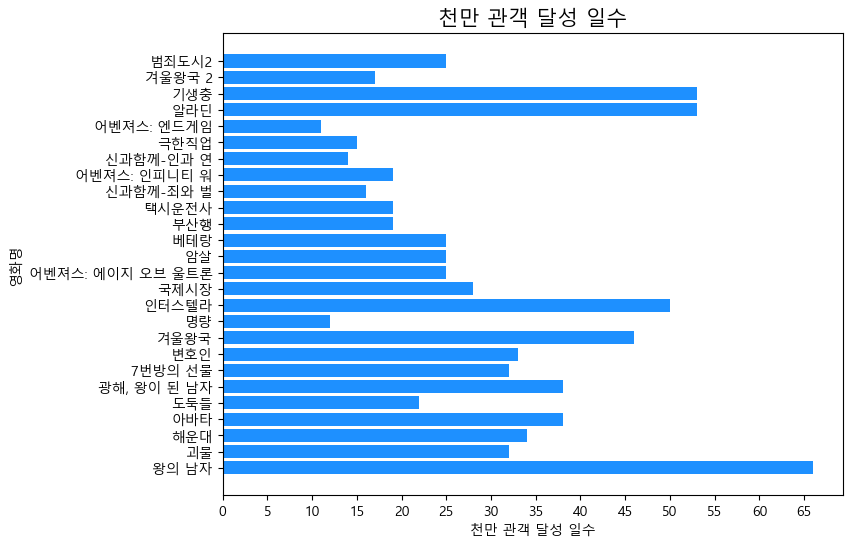

In [31]:
# 막대 그래프 그리기
x = mv_1000['영화명']
y = mv_1000['천만달성일']

plt.figure(figsize=(8,6))
plt.barh(x, y,color='dodgerblue')

# x축 눈금 설정
ax = plt.gca()  # 현재 축 객체 가져오기
ax.xaxis.set_major_locator(ticker.MultipleLocator(5))  # x축 눈금 간격 설정

# 그래프 제목과 축 이름 설정
plt.title('천만 관객 달성 일수', size = 15)
plt.xlabel('천만 관객 달성 일수')
plt.ylabel('영화명')

# 그래프 출력
plt.show()

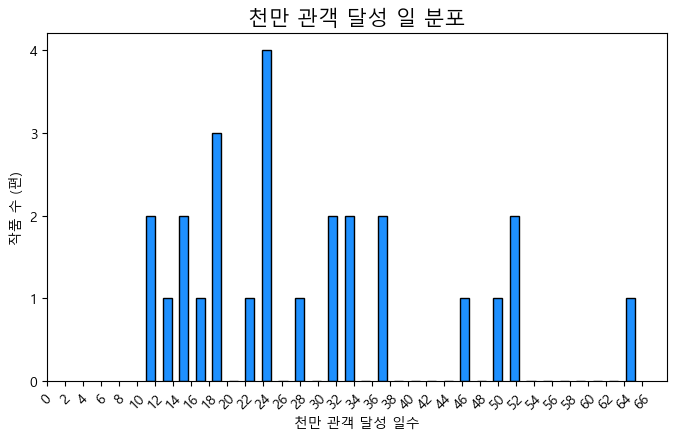

In [32]:
plt.figure(figsize=(8, 6))

# 히스토그램 그리기
plt.hist(mv_1000['천만달성일'], bins=30, edgecolor='black', width = 1, color='dodgerblue')  # 일수 데이터와 구간(bin) 개수 설정

# 그래프 제목과 축 이름 설정
plt.title('천만 관객 달성 일 분포', size = 15)
plt.xlabel('천만 관객 달성 일수')
plt.ylabel('작품 수 (편)')

# x축 눈금 설정
plt.xticks(range(0, max(mv_1000['천만달성일'])+1, 2), rotation=45)

# y축 눈금 설정
ay = plt.gca()  # 현재 축 객체 가져오기
ay.yaxis.set_major_locator(ticker.MultipleLocator(1))  # x축 눈금 간격 설정

# x축 값 크기 조정 및 오른쪽 맞춤
plt.subplots_adjust(bottom=0.3, right=0.9)

# 그래프 출력
plt.show()

# 천만관객 달성 평균 일수

In [33]:
day_1000_avg = int(mv_1000['천만달성일'].mean())
day_1000_short = int(mv_1000['천만달성일'].min())
day_1000_long = int(mv_1000['천만달성일'].max())
print(f'평균 : {day_1000_avg}일 \n최단 : {day_1000_short}일 \n최장 : {day_1000_long}일')

평균 : 29일 
최단 : 11일 
최장 : 66일


# 천만관객 영화명 리스트화

In [34]:
list_1000_name = mv_1000['영화명'].tolist()
list_1000_name

['왕의 남자',
 '괴물',
 '해운대',
 '아바타',
 '도둑들',
 '광해, 왕이 된 남자',
 '7번방의 선물',
 '변호인',
 '겨울왕국',
 '명량',
 '인터스텔라',
 '국제시장',
 '어벤져스: 에이지 오브 울트론',
 '암살',
 '베테랑',
 '부산행',
 '택시운전사',
 '신과함께-죄와 벌',
 '어벤져스: 인피니티 워',
 '신과함께-인과 연',
 '극한직업',
 '어벤져스: 엔드게임',
 '알라딘',
 '기생충',
 '겨울왕국 2',
 '범죄도시2']

# 천만관객 누적관객수 기준 정렬

In [35]:
top_list = pd.DataFrame()

for i in range(len(list_1000_name)):
    top5_1000 = movie_data[movie_data['영화명'] == list_1000_name[i]]
    top5_1000.sort_values('기준일', inplace=True)
    top_list = top_list.append(top5_1000.tail(1))

top_list

,순위,영화명,개봉일,등급,장르,대표국적,국적,제작사,배급사,감독,배우,기준일,매출액,누적매출액,관객수,누적관객수,스크린수,상영횟수
405385,47,왕의 남자,2005-12-29,15세이상관람가,드라마,한국,한국,"(주)씨네월드,(주)이글픽쳐스",(주)시네마서비스,이준익,"감우성,이준기,유해진,정진영,박영수,강성연,이건우,이동수,이동헌,유효정,윤준식,박성...",2020-09-15,83000,66019904400,10,10514177,1,1
359289,37,괴물,2006-07-27,12세관람가,"SF,가족,드라마",한국,한국,영화사청어람(주),(주)쇼박스,봉준호,"송강호,변희봉,박해일,배두나,고아성,오달수,박노식,라미란,고수희,윤제문,김뢰하,고창...",2019-05-26,943500,66717700300,106,10917400,1,1
467167,43,해운대,2009-07-22,12세이상관람가,"액션,드라마,어드벤처",한국,한국,(주)제이케이필름,CJ ENM,윤제균,"설경구,하지원,박중훈,엄정화,이민기,강대규,김원영,김유빈,신정원,성유경,박재홍,황인...",2022-07-08,215000,81028720000,43,11325117,1,1
329329,17,아바타,2009-12-17,12세이상관람가,"SF,액션,어드벤처",미국,미국,이십세기폭스필름코퍼레이션,"주식회사 해리슨앤컴퍼니,이십세기폭스코리아(주)",제임스 카메론,"샘 워싱턴,조 샐다나,시고니 위버",2018-07-03,8099000,125304346000,776,13338863,27,79
424892,95,도둑들,2012-07-25,15세이상관람가,"액션,범죄",한국,"한국,홍콩",(주)케이퍼필름,(주)쇼박스,최동훈,"김윤석,김혜수,이정재,전지현,임달화,김해숙,오달수,김수현,이심결,증국상,서영주,장동...",2021-03-29,10000,93672497700,2,12984701,1,1
378626,66,"광해, 왕이 된 남자",2012-09-13,15세이상관람가,"사극,드라마",한국,한국,"리얼라이즈픽쳐스(주),(주)씨제이이엔엠",(주)씨제이이엔엠,추창민,"이병헌,류승룡,한효주,장광,김인권,심은경,김명곤,서진원,장재현,정창국,조혜정,김남준...",2019-12-18,300000,88913283469,60,12324062,1,1
393794,73,7번방의 선물,2013-01-23,15세이상관람가,"코미디,드라마",한국,한국,"(주)화인웍스,(주)씨엘엔터테인먼트",(주)넥스트엔터테인먼트월드(NEW),이환경,"장이준,류승룡,박신혜,갈소원,정진영,오달수,박원상,김정태,정만식,김기천,장호준,김동...",2020-05-27,52000,91437368170,10,12812144,5,5
480923,73,변호인,2013-12-18,15세이상관람가,드라마,한국,한국,위더스필름(주),(주)넥스트엔터테인먼트월드(NEW),양우석,"송강호,김영애,오달수,곽도원,임시완,송영창,정원중,조민기,이항나,이성민,차광수,한기...",2022-12-12,106000,82876713788,12,11375399,1,1
386726,35,겨울왕국,2014-01-16,전체관람가,"애니메이션,어드벤처,가족,코미디,뮤지컬,판타지",미국,미국,NaN,소니픽쳐스릴리징월트디즈니스튜디오스코리아(주),"크리스 벅,제니퍼 리","이디나 멘젤,크리스틴 벨,조나단 그로프,조시 게드",2020-03-21,1575000,82521307080,177,10303058,1,1
481786,42,명량,2014-07-30,15세이상관람가,"사극,액션",한국,한국,(주)빅스톤픽쳐스,(주)씨제이이엔엠,김한민,"최민식,류승룡,조진웅,김명곤,진구,이정현,권율,노민우,이승준,오타니 료헤이,박보검,...",2022-12-20,450000,135758658810,75,17615919,2,2


In [36]:
# 천만관객 영화 랭킹순(누적관객)
top_list.sort_values('누적관객수', ascending=False, inplace=True)
top_list

,순위,영화명,개봉일,등급,장르,대표국적,국적,제작사,배급사,감독,배우,기준일,매출액,누적매출액,관객수,누적관객수,스크린수,상영횟수
481786,42,명량,2014-07-30,15세이상관람가,"사극,액션",한국,한국,(주)빅스톤픽쳐스,(주)씨제이이엔엠,김한민,"최민식,류승룡,조진웅,김명곤,진구,이정현,권율,노민우,이승준,오타니 료헤이,박보검,...",2022-12-20,450000,135758658810,75,17615919,2,2
395194,108,극한직업,2019-01-23,15세이상관람가,코미디,한국,한국,"(주)어바웃잇,영화사 해그림 주식회사,(주)씨제이이엔엠",(주)씨제이이엔엠,이병헌,"류승룡,이하늬,진선규,이동휘,공명,양현민,장진희,한준우,김명준,나철,정재광,정원창,...",2020-06-09,6000,139655543516,1,16266338,1,1
418675,64,신과함께-죄와 벌,2017-12-20,12세이상관람가,"판타지,드라마",한국,한국,"리얼라이즈픽쳐스(주),(주)덱스터스튜디오",롯데쇼핑㈜롯데엔터테인먼트,김용화,"하정우,차태현,주지훈,김향기,마동석,김동욱,도경수,오달수,임원희,장광,정해균,김수안...",2021-01-26,45000,115727528087,9,14414658,5,5
482061,33,국제시장,2014-12-17,12세이상관람가,드라마,한국,한국,"(주)제이케이필름,(주)씨제이이엔엠",(주)씨제이이엔엠,윤제균,"황정민,김윤진,오달수,정진영,장영남,라미란,김슬기,정영기,맹세창,김동원,김현중,김지...",2022-12-23,576000,110947621230,96,14264478,2,2
391617,8,어벤져스: 엔드게임,2019-04-24,12세이상관람가,"액션,SF",미국,미국,NaN,월트디즈니컴퍼니코리아 유한책임회사,"안소니 루소,조 루소","로버트 다우니 주니어,크리스 에반스,마크 러팔로,크리스 헴스워스,스칼렛 요한슨,제레...",2020-05-05,47233940,122492181020,6668,13977602,439,587
386725,35,겨울왕국 2,2019-11-21,전체관람가,애니메이션,미국,미국,NaN,월트디즈니컴퍼니코리아 유한책임회사,"크리스 벅,제니퍼 리","크리스틴 벨,이디나 멘젤,조시 게드,조나단 그로프",2020-03-21,1575000,114810421450,177,13747792,1,1
372424,61,베테랑,2015-08-05,15세이상관람가,"액션,드라마",한국,한국,"(주)외유내강,(주)필름케이",(주)씨제이이엔엠,류승완,"황정민,유아인,유해진,오달수,장윤주,김시후,오대환,정웅인,정만식,송영창,진경,유인영...",2019-10-23,324000,105170856250,61,13414484,9,10
329329,17,아바타,2009-12-17,12세이상관람가,"SF,액션,어드벤처",미국,미국,이십세기폭스필름코퍼레이션,"주식회사 해리슨앤컴퍼니,이십세기폭스코리아(주)",제임스 카메론,"샘 워싱턴,조 샐다나,시고니 위버",2018-07-03,8099000,125304346000,776,13338863,27,79
424892,95,도둑들,2012-07-25,15세이상관람가,"액션,범죄",한국,"한국,홍콩",(주)케이퍼필름,(주)쇼박스,최동훈,"김윤석,김혜수,이정재,전지현,임달화,김해숙,오달수,김수현,이심결,증국상,서영주,장동...",2021-03-29,10000,93672497700,2,12984701,1,1
393794,73,7번방의 선물,2013-01-23,15세이상관람가,"코미디,드라마",한국,한국,"(주)화인웍스,(주)씨엘엔터테인먼트",(주)넥스트엔터테인먼트월드(NEW),이환경,"장이준,류승룡,박신혜,갈소원,정진영,오달수,박원상,김정태,정만식,김기천,장호준,김동...",2020-05-27,52000,91437368170,10,12812144,5,5


# 천만관객 영화 중 상위 5개 영화명 리스트화

In [37]:
top5_name = top_list['영화명'].tolist()
top5_name

['명량',
 '극한직업',
 '신과함께-죄와 벌',
 '국제시장',
 '어벤져스: 엔드게임',
 '겨울왕국 2',
 '베테랑',
 '아바타',
 '도둑들',
 '7번방의 선물',
 '알라딘',
 '암살',
 '범죄도시2',
 '광해, 왕이 된 남자',
 '신과함께-인과 연',
 '택시운전사',
 '부산행',
 '변호인',
 '해운대',
 '어벤져스: 인피니티 워',
 '괴물',
 '왕의 남자',
 '어벤져스: 에이지 오브 울트론',
 '인터스텔라',
 '기생충',
 '겨울왕국']

# 천만관객 영화 중 상위 5개 시각화

In [38]:
top5_1000 = movie_data[movie_data['영화명'] == top5_name[0]]
top5_1000.sort_values('기준일', inplace=True)
top5_1000

,순위,영화명,개봉일,등급,장르,대표국적,국적,제작사,배급사,감독,배우,기준일,매출액,누적매출액,관객수,누적관객수,스크린수,상영횟수
203985,34,명량,2014-07-30,15세이상관람가,"사극,액션",한국,한국,(주)빅스톤픽쳐스,(주)씨제이이엔엠,김한민,"최민식,류승룡,조진웅,김명곤,진구,이정현,권율,노민우,이승준,오타니 료헤이,박보검,...",2014-07-20,1428000,1428000,238,238,1,1
204050,7,명량,2014-07-30,15세이상관람가,"사극,액션",한국,한국,(주)빅스톤픽쳐스,(주)씨제이이엔엠,김한민,"최민식,류승룡,조진웅,김명곤,진구,이정현,권율,노민우,이승준,오타니 료헤이,박보검,...",2014-07-21,44016000,45444000,5369,5607,18,28
204126,22,명량,2014-07-30,15세이상관람가,"사극,액션",한국,한국,(주)빅스톤픽쳐스,(주)씨제이이엔엠,김한민,"최민식,류승룡,조진웅,김명곤,진구,이정현,권율,노민우,이승준,오타니 료헤이,박보검,...",2014-07-22,4416000,49860000,552,6159,37,38
204204,9,명량,2014-07-30,15세이상관람가,"사극,액션",한국,한국,(주)빅스톤픽쳐스,(주)씨제이이엔엠,김한민,"최민식,류승룡,조진웅,김명곤,진구,이정현,권율,노민우,이승준,오타니 료헤이,박보검,...",2014-07-23,6696000,56556000,837,6996,4,4
204310,9,명량,2014-07-30,15세이상관람가,"사극,액션",한국,한국,(주)빅스톤픽쳐스,(주)씨제이이엔엠,김한민,"최민식,류승룡,조진웅,김명곤,진구,이정현,권율,노민우,이승준,오타니 료헤이,박보검,...",2014-07-24,14979000,71535000,1890,8886,8,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
466853,48,명량,2014-07-30,15세이상관람가,"사극,액션",한국,한국,(주)빅스톤픽쳐스,(주)씨제이이엔엠,김한민,"최민식,류승룡,조진웅,김명곤,진구,이정현,권율,노민우,이승준,오타니 료헤이,박보검,...",2022-07-04,175000,135757593810,35,17615721,1,1
466936,49,명량,2014-07-30,15세이상관람가,"사극,액션",한국,한국,(주)빅스톤픽쳐스,(주)씨제이이엔엠,김한민,"최민식,류승룡,조진웅,김명곤,진구,이정현,권율,노민우,이승준,오타니 료헤이,박보검,...",2022-07-05,225000,135757818810,45,17615766,1,1
467012,48,명량,2014-07-30,15세이상관람가,"사극,액션",한국,한국,(주)빅스톤픽쳐스,(주)씨제이이엔엠,김한민,"최민식,류승룡,조진웅,김명곤,진구,이정현,권율,노민우,이승준,오타니 료헤이,박보검,...",2022-07-06,175000,135757993810,35,17615801,1,1
467061,53,명량,2014-07-30,15세이상관람가,"사극,액션",한국,한국,(주)빅스톤픽쳐스,(주)씨제이이엔엠,김한민,"최민식,류승룡,조진웅,김명곤,진구,이정현,권율,노민우,이승준,오타니 료헤이,박보검,...",2022-07-07,215000,135758208810,43,17615844,1,1


In [39]:
for i in range(len(top_list)):
    for j in range(len(mv_1000)):
        if top_list.iloc[i]['영화명'] == mv_1000.iloc[j]['영화명']:
            top_list.at[top_list.index[i], '천만달성일'] = mv_1000.at[mv_1000.index[j], '천만달성일']
top_list['천만달성일'] = top_list['천만달성일'].astype(int)
top_list

,순위,영화명,개봉일,등급,장르,대표국적,국적,제작사,배급사,감독,배우,기준일,매출액,누적매출액,관객수,누적관객수,스크린수,상영횟수,천만달성일
481786,42,명량,2014-07-30,15세이상관람가,"사극,액션",한국,한국,(주)빅스톤픽쳐스,(주)씨제이이엔엠,김한민,"최민식,류승룡,조진웅,김명곤,진구,이정현,권율,노민우,이승준,오타니 료헤이,박보검,...",2022-12-20,450000,135758658810,75,17615919,2,2,12
395194,108,극한직업,2019-01-23,15세이상관람가,코미디,한국,한국,"(주)어바웃잇,영화사 해그림 주식회사,(주)씨제이이엔엠",(주)씨제이이엔엠,이병헌,"류승룡,이하늬,진선규,이동휘,공명,양현민,장진희,한준우,김명준,나철,정재광,정원창,...",2020-06-09,6000,139655543516,1,16266338,1,1,15
418675,64,신과함께-죄와 벌,2017-12-20,12세이상관람가,"판타지,드라마",한국,한국,"리얼라이즈픽쳐스(주),(주)덱스터스튜디오",롯데쇼핑㈜롯데엔터테인먼트,김용화,"하정우,차태현,주지훈,김향기,마동석,김동욱,도경수,오달수,임원희,장광,정해균,김수안...",2021-01-26,45000,115727528087,9,14414658,5,5,16
482061,33,국제시장,2014-12-17,12세이상관람가,드라마,한국,한국,"(주)제이케이필름,(주)씨제이이엔엠",(주)씨제이이엔엠,윤제균,"황정민,김윤진,오달수,정진영,장영남,라미란,김슬기,정영기,맹세창,김동원,김현중,김지...",2022-12-23,576000,110947621230,96,14264478,2,2,28
391617,8,어벤져스: 엔드게임,2019-04-24,12세이상관람가,"액션,SF",미국,미국,NaN,월트디즈니컴퍼니코리아 유한책임회사,"안소니 루소,조 루소","로버트 다우니 주니어,크리스 에반스,마크 러팔로,크리스 헴스워스,스칼렛 요한슨,제레...",2020-05-05,47233940,122492181020,6668,13977602,439,587,11
386725,35,겨울왕국 2,2019-11-21,전체관람가,애니메이션,미국,미국,NaN,월트디즈니컴퍼니코리아 유한책임회사,"크리스 벅,제니퍼 리","크리스틴 벨,이디나 멘젤,조시 게드,조나단 그로프",2020-03-21,1575000,114810421450,177,13747792,1,1,17
372424,61,베테랑,2015-08-05,15세이상관람가,"액션,드라마",한국,한국,"(주)외유내강,(주)필름케이",(주)씨제이이엔엠,류승완,"황정민,유아인,유해진,오달수,장윤주,김시후,오대환,정웅인,정만식,송영창,진경,유인영...",2019-10-23,324000,105170856250,61,13414484,9,10,25
329329,17,아바타,2009-12-17,12세이상관람가,"SF,액션,어드벤처",미국,미국,이십세기폭스필름코퍼레이션,"주식회사 해리슨앤컴퍼니,이십세기폭스코리아(주)",제임스 카메론,"샘 워싱턴,조 샐다나,시고니 위버",2018-07-03,8099000,125304346000,776,13338863,27,79,38
424892,95,도둑들,2012-07-25,15세이상관람가,"액션,범죄",한국,"한국,홍콩",(주)케이퍼필름,(주)쇼박스,최동훈,"김윤석,김혜수,이정재,전지현,임달화,김해숙,오달수,김수현,이심결,증국상,서영주,장동...",2021-03-29,10000,93672497700,2,12984701,1,1,22
393794,73,7번방의 선물,2013-01-23,15세이상관람가,"코미디,드라마",한국,한국,"(주)화인웍스,(주)씨엘엔터테인먼트",(주)넥스트엔터테인먼트월드(NEW),이환경,"장이준,류승룡,박신혜,갈소원,정진영,오달수,박원상,김정태,정만식,김기천,장호준,김동...",2020-05-27,52000,91437368170,10,12812144,5,5,32


In [40]:
# 기준선
day_1000_line = top_list.iloc[0]['천만달성일']
day_1000_line

12

# 일일 관객수 변화

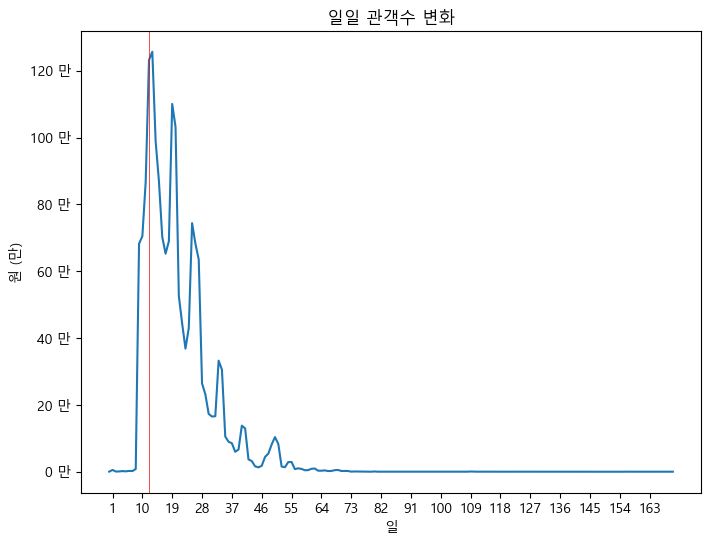

In [41]:
# 그림 크기 설정
plt.figure(figsize=(8, 6))  # 가로 8인치, 세로 6인치

# 꺾은선 그래프 그리기
plt.plot(range(len(top5_1000)), top5_1000['관객수'])

# 기준선 그리기
plt.axvline(x=day_1000_line, color='red', linewidth=0.5)

# 그래프 제목과 축 이름 설정
plt.title('일일 관객수 변화')
plt.xlabel('일')
plt.ylabel('원 (만)')

# x축 눈금 설정
plt.xticks(range(1, len(top5_1000) + 1, 9), range(1, len(top5_1000) + 1, 9))

# y축의 단위를 만으로 설정
formatter = ticker.FuncFormatter(lambda x, pos: '{:.0f} 만'.format(x / 10000))
plt.gca().yaxis.set_major_formatter(formatter)

# 그래프 출력
plt.show()

# 일일 매출 변화

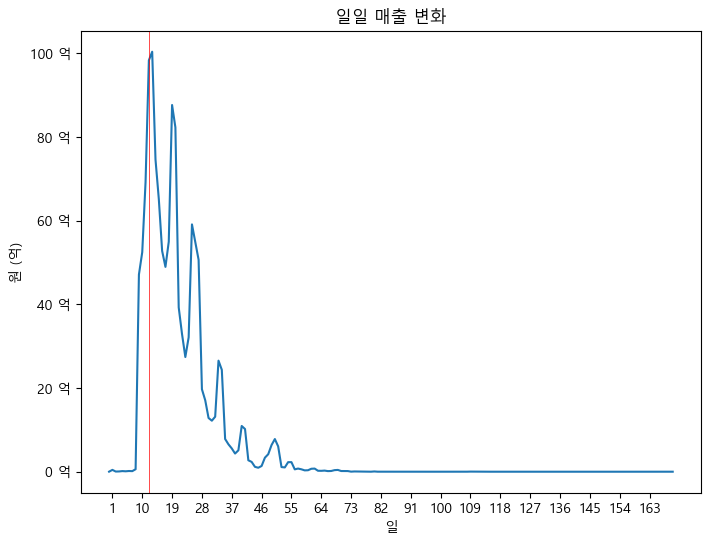

In [42]:
# 그림 크기 설정
plt.figure(figsize=(8, 6))  # 가로 8인치, 세로 6인치

# 꺾은선 그래프 그리기
plt.plot(range(len(top5_1000)), top5_1000['매출액'])

# 기준선 그리기
plt.axvline(x=day_1000_line, color='red', linewidth=0.5)

# 그래프 제목과 축 이름 설정
plt.title('일일 매출 변화')
plt.xlabel('일')
plt.ylabel('원 (억)')

# x축 눈금 설정
plt.xticks(range(1, len(top5_1000) + 1, 9), range(1, len(top5_1000) + 1, 9))

# y축의 단위를 만으로 설정
formatter = ticker.FuncFormatter(lambda x, pos: '{:.0f} 억'.format(x / 1e8))
plt.gca().yaxis.set_major_formatter(formatter)

# 그래프 출력
plt.show()

# 천만관객 영화 중 TOP5

In [43]:
top_list

,순위,영화명,개봉일,등급,장르,대표국적,국적,제작사,배급사,감독,배우,기준일,매출액,누적매출액,관객수,누적관객수,스크린수,상영횟수,천만달성일
481786,42,명량,2014-07-30,15세이상관람가,"사극,액션",한국,한국,(주)빅스톤픽쳐스,(주)씨제이이엔엠,김한민,"최민식,류승룡,조진웅,김명곤,진구,이정현,권율,노민우,이승준,오타니 료헤이,박보검,...",2022-12-20,450000,135758658810,75,17615919,2,2,12
395194,108,극한직업,2019-01-23,15세이상관람가,코미디,한국,한국,"(주)어바웃잇,영화사 해그림 주식회사,(주)씨제이이엔엠",(주)씨제이이엔엠,이병헌,"류승룡,이하늬,진선규,이동휘,공명,양현민,장진희,한준우,김명준,나철,정재광,정원창,...",2020-06-09,6000,139655543516,1,16266338,1,1,15
418675,64,신과함께-죄와 벌,2017-12-20,12세이상관람가,"판타지,드라마",한국,한국,"리얼라이즈픽쳐스(주),(주)덱스터스튜디오",롯데쇼핑㈜롯데엔터테인먼트,김용화,"하정우,차태현,주지훈,김향기,마동석,김동욱,도경수,오달수,임원희,장광,정해균,김수안...",2021-01-26,45000,115727528087,9,14414658,5,5,16
482061,33,국제시장,2014-12-17,12세이상관람가,드라마,한국,한국,"(주)제이케이필름,(주)씨제이이엔엠",(주)씨제이이엔엠,윤제균,"황정민,김윤진,오달수,정진영,장영남,라미란,김슬기,정영기,맹세창,김동원,김현중,김지...",2022-12-23,576000,110947621230,96,14264478,2,2,28
391617,8,어벤져스: 엔드게임,2019-04-24,12세이상관람가,"액션,SF",미국,미국,NaN,월트디즈니컴퍼니코리아 유한책임회사,"안소니 루소,조 루소","로버트 다우니 주니어,크리스 에반스,마크 러팔로,크리스 헴스워스,스칼렛 요한슨,제레...",2020-05-05,47233940,122492181020,6668,13977602,439,587,11
386725,35,겨울왕국 2,2019-11-21,전체관람가,애니메이션,미국,미국,NaN,월트디즈니컴퍼니코리아 유한책임회사,"크리스 벅,제니퍼 리","크리스틴 벨,이디나 멘젤,조시 게드,조나단 그로프",2020-03-21,1575000,114810421450,177,13747792,1,1,17
372424,61,베테랑,2015-08-05,15세이상관람가,"액션,드라마",한국,한국,"(주)외유내강,(주)필름케이",(주)씨제이이엔엠,류승완,"황정민,유아인,유해진,오달수,장윤주,김시후,오대환,정웅인,정만식,송영창,진경,유인영...",2019-10-23,324000,105170856250,61,13414484,9,10,25
329329,17,아바타,2009-12-17,12세이상관람가,"SF,액션,어드벤처",미국,미국,이십세기폭스필름코퍼레이션,"주식회사 해리슨앤컴퍼니,이십세기폭스코리아(주)",제임스 카메론,"샘 워싱턴,조 샐다나,시고니 위버",2018-07-03,8099000,125304346000,776,13338863,27,79,38
424892,95,도둑들,2012-07-25,15세이상관람가,"액션,범죄",한국,"한국,홍콩",(주)케이퍼필름,(주)쇼박스,최동훈,"김윤석,김혜수,이정재,전지현,임달화,김해숙,오달수,김수현,이심결,증국상,서영주,장동...",2021-03-29,10000,93672497700,2,12984701,1,1,22
393794,73,7번방의 선물,2013-01-23,15세이상관람가,"코미디,드라마",한국,한국,"(주)화인웍스,(주)씨엘엔터테인먼트",(주)넥스트엔터테인먼트월드(NEW),이환경,"장이준,류승룡,박신혜,갈소원,정진영,오달수,박원상,김정태,정만식,김기천,장호준,김동...",2020-05-27,52000,91437368170,10,12812144,5,5,32


In [44]:
top5_1000

,순위,영화명,개봉일,등급,장르,대표국적,국적,제작사,배급사,감독,배우,기준일,매출액,누적매출액,관객수,누적관객수,스크린수,상영횟수
203985,34,명량,2014-07-30,15세이상관람가,"사극,액션",한국,한국,(주)빅스톤픽쳐스,(주)씨제이이엔엠,김한민,"최민식,류승룡,조진웅,김명곤,진구,이정현,권율,노민우,이승준,오타니 료헤이,박보검,...",2014-07-20,1428000,1428000,238,238,1,1
204050,7,명량,2014-07-30,15세이상관람가,"사극,액션",한국,한국,(주)빅스톤픽쳐스,(주)씨제이이엔엠,김한민,"최민식,류승룡,조진웅,김명곤,진구,이정현,권율,노민우,이승준,오타니 료헤이,박보검,...",2014-07-21,44016000,45444000,5369,5607,18,28
204126,22,명량,2014-07-30,15세이상관람가,"사극,액션",한국,한국,(주)빅스톤픽쳐스,(주)씨제이이엔엠,김한민,"최민식,류승룡,조진웅,김명곤,진구,이정현,권율,노민우,이승준,오타니 료헤이,박보검,...",2014-07-22,4416000,49860000,552,6159,37,38
204204,9,명량,2014-07-30,15세이상관람가,"사극,액션",한국,한국,(주)빅스톤픽쳐스,(주)씨제이이엔엠,김한민,"최민식,류승룡,조진웅,김명곤,진구,이정현,권율,노민우,이승준,오타니 료헤이,박보검,...",2014-07-23,6696000,56556000,837,6996,4,4
204310,9,명량,2014-07-30,15세이상관람가,"사극,액션",한국,한국,(주)빅스톤픽쳐스,(주)씨제이이엔엠,김한민,"최민식,류승룡,조진웅,김명곤,진구,이정현,권율,노민우,이승준,오타니 료헤이,박보검,...",2014-07-24,14979000,71535000,1890,8886,8,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
466853,48,명량,2014-07-30,15세이상관람가,"사극,액션",한국,한국,(주)빅스톤픽쳐스,(주)씨제이이엔엠,김한민,"최민식,류승룡,조진웅,김명곤,진구,이정현,권율,노민우,이승준,오타니 료헤이,박보검,...",2022-07-04,175000,135757593810,35,17615721,1,1
466936,49,명량,2014-07-30,15세이상관람가,"사극,액션",한국,한국,(주)빅스톤픽쳐스,(주)씨제이이엔엠,김한민,"최민식,류승룡,조진웅,김명곤,진구,이정현,권율,노민우,이승준,오타니 료헤이,박보검,...",2022-07-05,225000,135757818810,45,17615766,1,1
467012,48,명량,2014-07-30,15세이상관람가,"사극,액션",한국,한국,(주)빅스톤픽쳐스,(주)씨제이이엔엠,김한민,"최민식,류승룡,조진웅,김명곤,진구,이정현,권율,노민우,이승준,오타니 료헤이,박보검,...",2022-07-06,175000,135757993810,35,17615801,1,1
467061,53,명량,2014-07-30,15세이상관람가,"사극,액션",한국,한국,(주)빅스톤픽쳐스,(주)씨제이이엔엠,김한민,"최민식,류승룡,조진웅,김명곤,진구,이정현,권율,노민우,이승준,오타니 료헤이,박보검,...",2022-07-07,215000,135758208810,43,17615844,1,1


In [45]:
top = top5_1000[top5_1000['영화명'] == top5_name[0]]
top = top.sort_values('기준일')
top

,순위,영화명,개봉일,등급,장르,대표국적,국적,제작사,배급사,감독,배우,기준일,매출액,누적매출액,관객수,누적관객수,스크린수,상영횟수
203985,34,명량,2014-07-30,15세이상관람가,"사극,액션",한국,한국,(주)빅스톤픽쳐스,(주)씨제이이엔엠,김한민,"최민식,류승룡,조진웅,김명곤,진구,이정현,권율,노민우,이승준,오타니 료헤이,박보검,...",2014-07-20,1428000,1428000,238,238,1,1
204050,7,명량,2014-07-30,15세이상관람가,"사극,액션",한국,한국,(주)빅스톤픽쳐스,(주)씨제이이엔엠,김한민,"최민식,류승룡,조진웅,김명곤,진구,이정현,권율,노민우,이승준,오타니 료헤이,박보검,...",2014-07-21,44016000,45444000,5369,5607,18,28
204126,22,명량,2014-07-30,15세이상관람가,"사극,액션",한국,한국,(주)빅스톤픽쳐스,(주)씨제이이엔엠,김한민,"최민식,류승룡,조진웅,김명곤,진구,이정현,권율,노민우,이승준,오타니 료헤이,박보검,...",2014-07-22,4416000,49860000,552,6159,37,38
204204,9,명량,2014-07-30,15세이상관람가,"사극,액션",한국,한국,(주)빅스톤픽쳐스,(주)씨제이이엔엠,김한민,"최민식,류승룡,조진웅,김명곤,진구,이정현,권율,노민우,이승준,오타니 료헤이,박보검,...",2014-07-23,6696000,56556000,837,6996,4,4
204310,9,명량,2014-07-30,15세이상관람가,"사극,액션",한국,한국,(주)빅스톤픽쳐스,(주)씨제이이엔엠,김한민,"최민식,류승룡,조진웅,김명곤,진구,이정현,권율,노민우,이승준,오타니 료헤이,박보검,...",2014-07-24,14979000,71535000,1890,8886,8,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
466853,48,명량,2014-07-30,15세이상관람가,"사극,액션",한국,한국,(주)빅스톤픽쳐스,(주)씨제이이엔엠,김한민,"최민식,류승룡,조진웅,김명곤,진구,이정현,권율,노민우,이승준,오타니 료헤이,박보검,...",2022-07-04,175000,135757593810,35,17615721,1,1
466936,49,명량,2014-07-30,15세이상관람가,"사극,액션",한국,한국,(주)빅스톤픽쳐스,(주)씨제이이엔엠,김한민,"최민식,류승룡,조진웅,김명곤,진구,이정현,권율,노민우,이승준,오타니 료헤이,박보검,...",2022-07-05,225000,135757818810,45,17615766,1,1
467012,48,명량,2014-07-30,15세이상관람가,"사극,액션",한국,한국,(주)빅스톤픽쳐스,(주)씨제이이엔엠,김한민,"최민식,류승룡,조진웅,김명곤,진구,이정현,권율,노민우,이승준,오타니 료헤이,박보검,...",2022-07-06,175000,135757993810,35,17615801,1,1
467061,53,명량,2014-07-30,15세이상관람가,"사극,액션",한국,한국,(주)빅스톤픽쳐스,(주)씨제이이엔엠,김한민,"최민식,류승룡,조진웅,김명곤,진구,이정현,권율,노민우,이승준,오타니 료헤이,박보검,...",2022-07-07,215000,135758208810,43,17615844,1,1


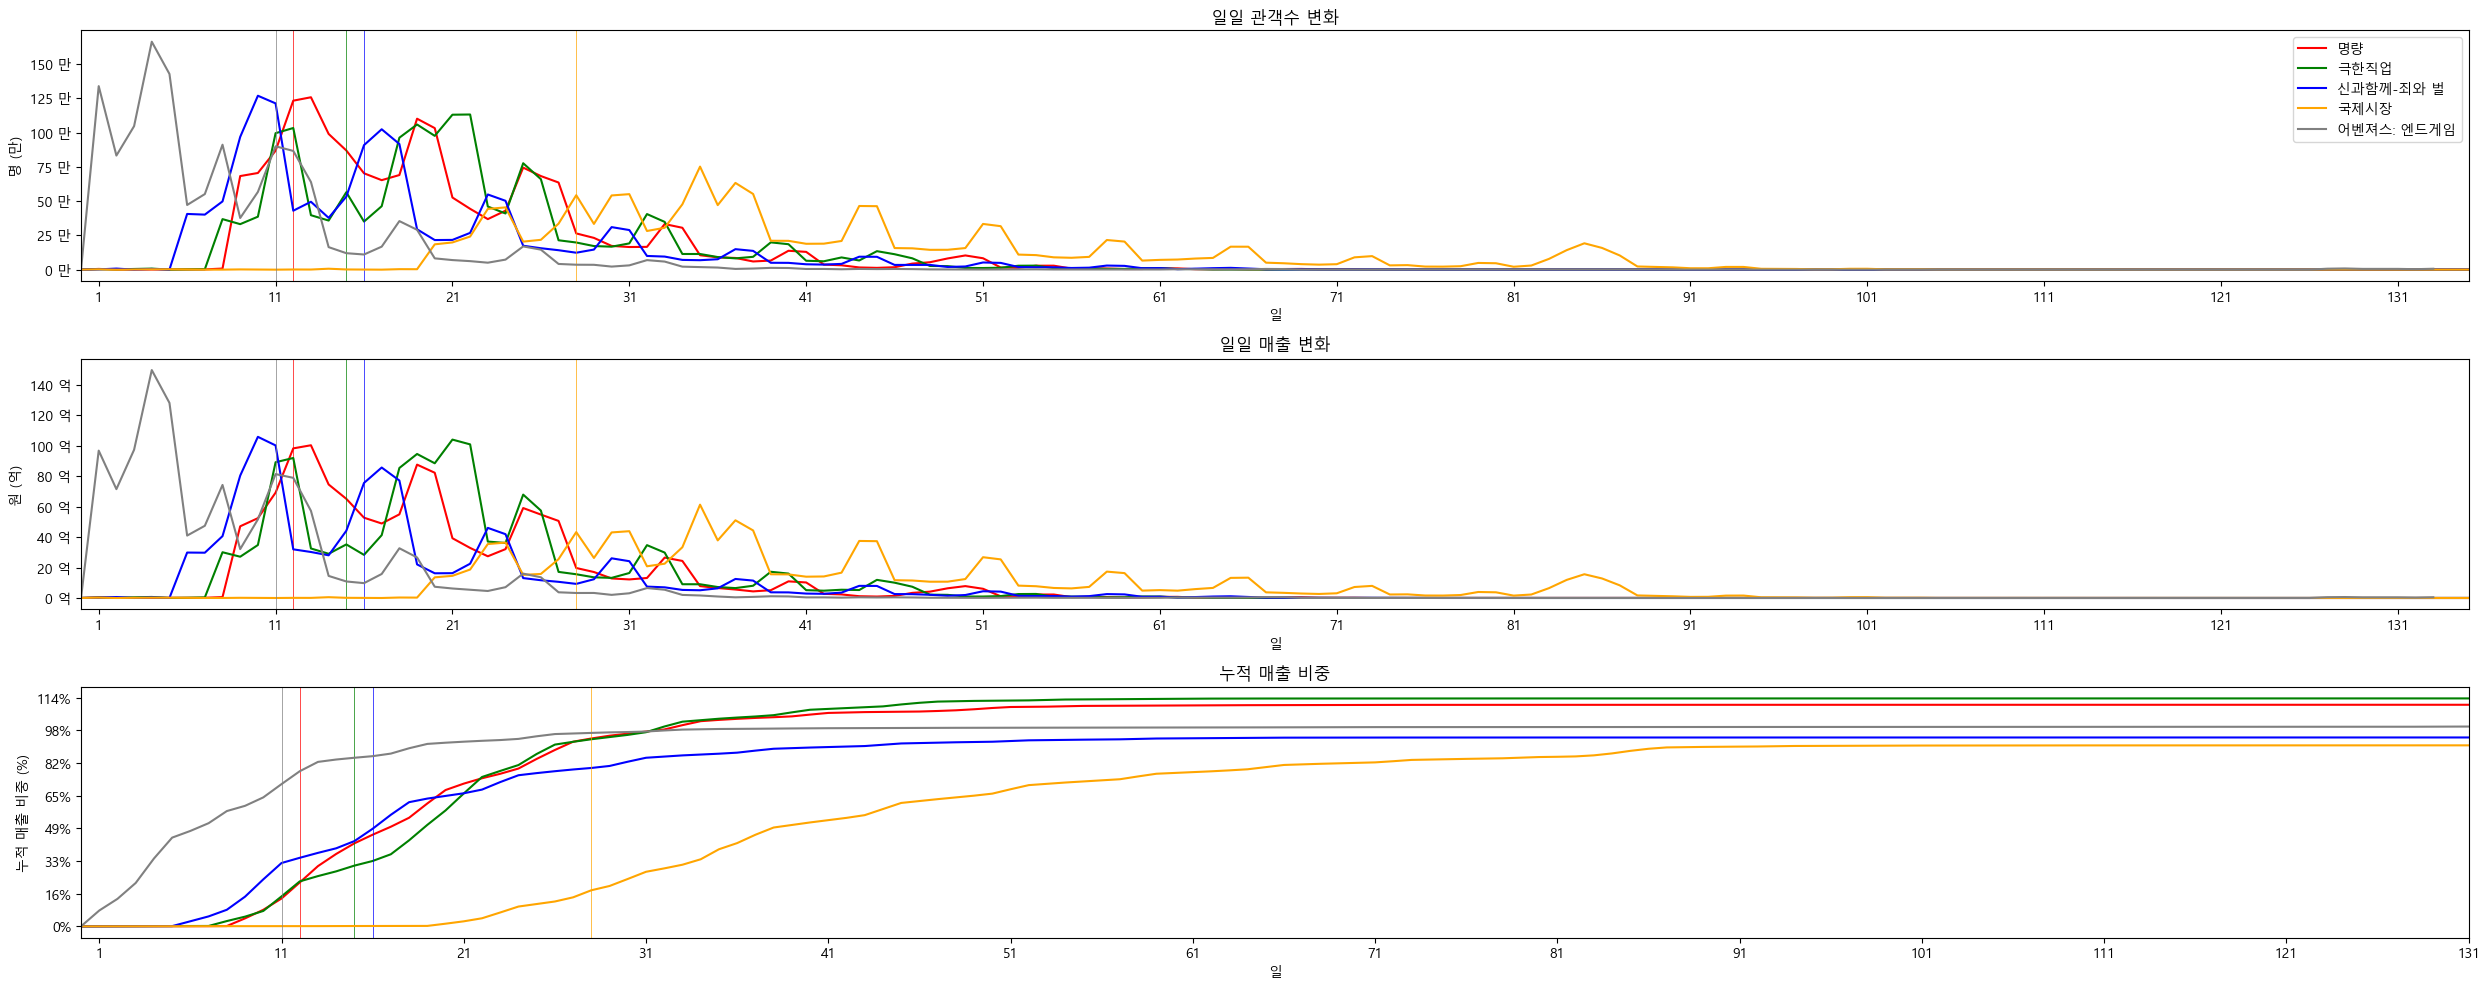

In [46]:
# 그림 크기 설정
plt.figure(figsize=(25, 10))  # 가로 12인치, 세로 8인치

color_list = ['red', 'green', 'blue', 'orange', 'grey']

# 서브플롯 1: 관객수 변화
plt.subplot(311)
for i in range(5):
    top = movie_data[movie_data['영화명'] == top5_name[i]]
    top_name = top['영화명']
    day_1000_line = top_list.iloc[i]['천만달성일']
    plt.plot(range(len(top)), top['관객수'], color=color_list[i], label=top_name.iloc[0])  # 라벨 추가
    plt.axvline(x=day_1000_line, color=color_list[i], linewidth=0.5)
plt.title('일일 관객수 변화')
plt.xlabel('일')
plt.ylabel('명 (만)')
plt.xticks(range(1, len(top) + 1, 10), range(1, len(top) + 1, 10))
plt.xlim(0,135)
formatter1 = ticker.FuncFormatter(lambda x, pos: '{:.0f} 만'.format(x / 10000))
plt.gca().yaxis.set_major_formatter(formatter1)
plt.legend(loc='upper right')  # 범례 추가
plt.subplots_adjust(left=0.1, bottom=0.1, right=0.9, top=0.9, wspace=0.4, hspace=0.6)

# 서브플롯 2: 매출 변화
plt.subplot(312)
for i in range(5):
    top = movie_data[movie_data['영화명'] == top5_name[i]]
    top_name = top['영화명']
    day_1000_line = top_list.iloc[i]['천만달성일']
    plt.plot(range(len(top)), top['매출액'], color=color_list[i])
    plt.axvline(x=day_1000_line, color=color_list[i], linewidth=0.5)
plt.title('일일 매출 변화')
plt.xlabel('일')
plt.ylabel('원 (억)')
plt.xticks(range(1, len(top) + 1, 10), range(1, len(top) + 1, 10))
plt.xlim(0,135)
formatter2 = ticker.FuncFormatter(lambda x, pos: '{:.0f} 억'.format(x / 1e8))
plt.gca().yaxis.set_major_formatter(formatter2)
plt.subplots_adjust(left=0.1, bottom=0.1, right=0.9, top=0.9, wspace=0.4, hspace=0.6)

# 서브플롯 3: 누적매출 비중
plt.subplot(313)
for i in range(5):
    top = movie_data[movie_data['영화명'] == top5_name[i]]
    top_name = top['영화명']
    day_1000_line = top_list.iloc[i]['천만달성일']
    plt.plot(range(len(top)), top['누적매출액'], color=color_list[i])
    plt.axvline(x=day_1000_line, color=color_list[i], linewidth=0.5)
plt.title('누적 매출 비중')
plt.xlabel('일')
plt.xlim(0,100)
plt.ylabel('누적 매출 비중 (%)')
plt.xticks(range(1, len(top) + 1, 10), range(1, len(top) + 1, 10))
plt.gca().yaxis.set_major_formatter(ticker.PercentFormatter(xmax=top['누적매출액'].iloc[-1]))
plt.subplots_adjust(left=0.1, bottom=0.1, right=0.9, top=0.9, wspace=0.4, hspace=0.6)


# 그래프 출력
plt.tight_layout()
plt.show()

# 900만 관객 영화 필터링

In [47]:
# 사본 만들기
movie_data_test = movie_data

In [48]:
movie_data_test.drop_duplicates(subset='영화명', keep='last', inplace=True)

In [49]:
# 누적관객수 900대인 영화(1000만 관객 실패)
movie_900 = movie_data_test[(movie_data_test['누적관객수'] >= 9000000) & (movie_data_test['누적관객수'] < 10000000)]
movie_900

,순위,영화명,개봉일,등급,장르,대표국적,국적,제작사,배급사,감독,배우,기준일,매출액,누적매출액,관객수,누적관객수,스크린수,상영횟수
275099,105,검사외전,2016-02-03,15세이상관람가,"범죄,코미디",한국,한국,"(주)영화사 월광,(주)사나이픽처스",(주)쇼박스,이일형,"황정민,강동원,이성민,박성웅,김응수,신소율,주진모,김원해,김홍파,김병옥,박종환,전배...",2016-12-05,54000,77320403264,6,9707581,1,1
309844,140,관상,2013-09-11,15세이상관람가,"사극,드라마",한국,한국,"(주)주피터필름,(주)쇼박스",(주)쇼박스,한재림,"송강호,이정재,백윤식,조정석,이종석,김혜수,신기원,윤종구,윤희원,이도엽,권영각,김길...",2017-12-09,0,66009826500,0,9135806,1,1
340777,76,아이언맨 3,2013-04-25,12세이상관람가,"액션,어드벤처,SF",미국,미국,파라마운트 픽쳐스,소니픽쳐스릴리징월트디즈니스튜디오스코리아(주),쉐인 블랙,"로버트 다우니 주니어,기네스 팰트로우,벤 킹슬리,가이 피어스,레베카 홀,폴 베타니,...",2018-11-06,150000,70809259500,20,9001679,2,2
356234,105,보헤미안 랩소디,2018-10-31,12세이상관람가,드라마,미국,미국,NaN,"월트디즈니컴퍼니코리아 유한책임회사,이십세기폭스코리아(주)",브라이언 싱어,"라미 말렉,조셉 마젤로,마이크 마이어스,루시 보인턴",2019-04-23,59300,86280975785,7,9948386,1,1
407345,82,설국열차,2013-08-01,15세이상관람가,"SF,액션",한국,"한국,체코","모호필름,오퍼스픽쳐스(유)",(주)씨제이이엔엠,봉준호,"크리스 에반스,송강호,에드 해리스,존 허트,틸다 스윈튼,제이미 벨,옥타비아 스펜서,...",2020-10-10,7000,67035020000,7,9353799,1,1
477638,40,엑시트,2019-07-31,12세이상관람가,"코미디,액션",한국,한국,"(주)외유내강,(주)필름케이",(주)씨제이이엔엠,이상근,"조정석,임윤아,고두심,박인환,김지영,강기영,오희준,배유람,유수빈,조성희,주보비,김강...",2022-11-08,914000,79239937162,114,9426960,25,33


In [50]:
len(movie_900)

6

# 900만 관객 포함 개봉월

In [51]:
movie_900['개봉일']

275099    2016-02-03
309844    2013-09-11
340777    2013-04-25
356234    2018-10-31
407345    2013-08-01
477638    2019-07-31
Name: 개봉일, dtype: object

In [52]:
mv_ymd_900 = pd.to_datetime(movie_900['개봉일'])
mv_ymd_900

275099   2016-02-03
309844   2013-09-11
340777   2013-04-25
356234   2018-10-31
407345   2013-08-01
477638   2019-07-31
Name: 개봉일, dtype: datetime64[ns]

In [53]:
movie_900['개봉연도'] = mv_ymd_900.dt.year
movie_900['개봉월'] = mv_ymd_900.dt.month
movie_900['개봉일'] = mv_ymd_900.dt.day

day_of_week = mv_ymd_900.dt.dayofweek
day_map = {0: '월', 1: '화', 2: '수', 3: '목', 4: '금', 5: '토', 6: '일'}
movie_900['개봉요일'] = day_of_week.map(day_map)

movie_900 = movie_900[['순위','영화명','개봉연도','개봉월','개봉일','개봉요일',
                         '등급','장르','대표국적','국적','제작사','배급사','감독',
                         '배우 ','기준일','매출액','누적매출액','관객수','누적관객수',
                         '스크린수','상영횟수']]
movie_900

,순위,영화명,개봉연도,개봉월,개봉일,개봉요일,등급,장르,대표국적,국적,...,배급사,감독,배우,기준일,매출액,누적매출액,관객수,누적관객수,스크린수,상영횟수
275099,105,검사외전,2016,2,3,수,15세이상관람가,"범죄,코미디",한국,한국,...,(주)쇼박스,이일형,"황정민,강동원,이성민,박성웅,김응수,신소율,주진모,김원해,김홍파,김병옥,박종환,전배...",2016-12-05,54000,77320403264,6,9707581,1,1
309844,140,관상,2013,9,11,수,15세이상관람가,"사극,드라마",한국,한국,...,(주)쇼박스,한재림,"송강호,이정재,백윤식,조정석,이종석,김혜수,신기원,윤종구,윤희원,이도엽,권영각,김길...",2017-12-09,0,66009826500,0,9135806,1,1
340777,76,아이언맨 3,2013,4,25,목,12세이상관람가,"액션,어드벤처,SF",미국,미국,...,소니픽쳐스릴리징월트디즈니스튜디오스코리아(주),쉐인 블랙,"로버트 다우니 주니어,기네스 팰트로우,벤 킹슬리,가이 피어스,레베카 홀,폴 베타니,...",2018-11-06,150000,70809259500,20,9001679,2,2
356234,105,보헤미안 랩소디,2018,10,31,수,12세이상관람가,드라마,미국,미국,...,"월트디즈니컴퍼니코리아 유한책임회사,이십세기폭스코리아(주)",브라이언 싱어,"라미 말렉,조셉 마젤로,마이크 마이어스,루시 보인턴",2019-04-23,59300,86280975785,7,9948386,1,1
407345,82,설국열차,2013,8,1,목,15세이상관람가,"SF,액션",한국,"한국,체코",...,(주)씨제이이엔엠,봉준호,"크리스 에반스,송강호,에드 해리스,존 허트,틸다 스윈튼,제이미 벨,옥타비아 스펜서,...",2020-10-10,7000,67035020000,7,9353799,1,1
477638,40,엑시트,2019,7,31,수,12세이상관람가,"코미디,액션",한국,한국,...,(주)씨제이이엔엠,이상근,"조정석,임윤아,고두심,박인환,김지영,강기영,오희준,배유람,유수빈,조성희,주보비,김강...",2022-11-08,914000,79239937162,114,9426960,25,33


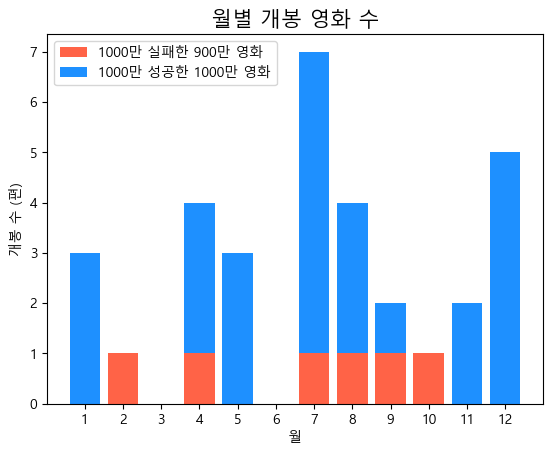

In [54]:

# 개봉월별 개봉영화 수 계산
monthly_counts_900 = movie_900['개봉월'].value_counts().sort_index()
monthly_counts_1000 = movie_1000['개봉월'].value_counts().sort_index()

# 인덱스 개수 맞추기
all_months = range(1, 13)
monthly_counts_900 = monthly_counts_900.reindex(all_months, fill_value=0)
monthly_counts_1000 = monthly_counts_1000.reindex(all_months, fill_value=0)

# 누적 막대 그래프 그리기
plt.bar(all_months, monthly_counts_900, color='tomato', label='1000만 실패한 900만 영화')
plt.bar(all_months, monthly_counts_1000, color='dodgerblue', label='1000만 성공한 1000만 영화', bottom=monthly_counts_900)

# 축과 제목 설정
plt.xlabel('월')
plt.ylabel('개봉 수 (편)')
plt.title('월별 개봉 영화 수', size = 15)

# x축 눈금 설정
plt.xticks(range(1, 13))

# 범례 표시
plt.legend()

# 그래프 출력
plt.show()

# 900만 관객 포함 개봉요일

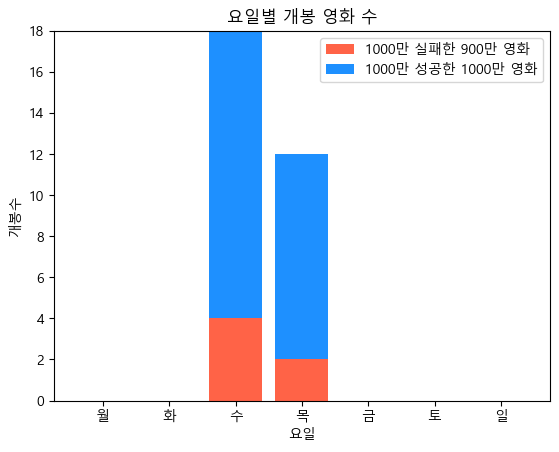

In [55]:
# 요일별 개봉수 계산
weekday_counts_900 = movie_900['개봉요일'].value_counts().reindex(['월', '화', '수', '목', '금', '토', '일'], fill_value=0)
weekday_counts_1000 = movie_1000['개봉요일'].value_counts().reindex(['월', '화', '수', '목', '금', '토', '일'], fill_value=0)

# 개별 막대 그래프를 누적 막대 그래프로 변환
plt.bar(weekday_counts_900.index, weekday_counts_900.values, color='tomato', label='1000만 실패한 900만 영화')
plt.bar(weekday_counts_1000.index, weekday_counts_1000.values, color='dodgerblue', label='1000만 성공한 1000만 영화', bottom=weekday_counts_900.values)

# 축과 제목 설정
plt.xlabel('요일')
plt.ylabel('개봉수')
plt.title('요일별 개봉 영화 수')
plt.ylim(0, 18)

# 범례 표시
plt.legend()

# 그래프 출력
plt.show()